Разбор данных по Хиагде

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker
import geopandas as gpd
%matplotlib inline


In [69]:
df = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\2 этап\\Приложения\\addonK.xlsx', header = 2)

In [70]:
df = df.replace(',','.',regex=True)
#df = [x.replace(',', '.') for x in df]
df.iloc[:,5:]= df.iloc[:,3:].astype(float)
df
#df = df.astype(float)
#df.apply(lambda x: x.str.replace(',','.'))


,№ пп,Дата отбора,Скважина,Залежь,X,Y,рН,"Мобщ, мг/л","СО2, мг/л","НСО3-, мг/л","Mg2+, мг/л"
0,1,1985-07-10,2758,3,47955.568,11564.599,7.0,1987.0,440.0,1293.0,126.0
1,2,1985-07-21,2883,5,48810.967,14285.493,7.6,814.6,185.0,1000.0,81.6
2,3,1986-07-16,2937,4,47912.326,12994.500,6.2,669.0,1430.0,841.8,72.0
3,4,1986-07-20,3472,3,47963.612,11575.829,6.8,1427.6,286.0,1702.0,216.0
4,5,1986-07-21,2888,5,49621.931,13729.943,7.4,254.6,1050.0,329.4,31.2
5,6,1987-07-14,3473,3,47543.477,11855.289,7.1,233.4,101.0,292.8,26.4
6,7,1987-07-14,3572,5,49140.263,14070.075,8.3,211.6,18.0,268.4,22.8
7,8,1987-07-14,3671,5,49142.312,14076.299,7.5,148.3,51.0,183.0,16.8
8,9,1985-05-28,2823,3,46607.911,12127.358,7.9,661.1,NaN,793.0,56.4
9,10,1986-05-20,3283,7,50426.837,16797.973,7.7,127.0,NaN,146.4,12.0


,рН,"Мобщ, мг/л","СО2, мг/л","НСО3-, мг/л","Mg2+, мг/л"
рН,1.000000,-0.349614,-0.722260,-0.372412,-0.373340
"Мобщ, мг/л",-0.349614,1.000000,0.101244,0.921407,0.881432
"СО2, мг/л",-0.722260,0.101244,1.000000,0.148188,0.082648
"НСО3-, мг/л",-0.372412,0.921407,0.148188,1.000000,0.969837
"Mg2+, мг/л",-0.373340,0.881432,0.082648,0.969837,1.000000


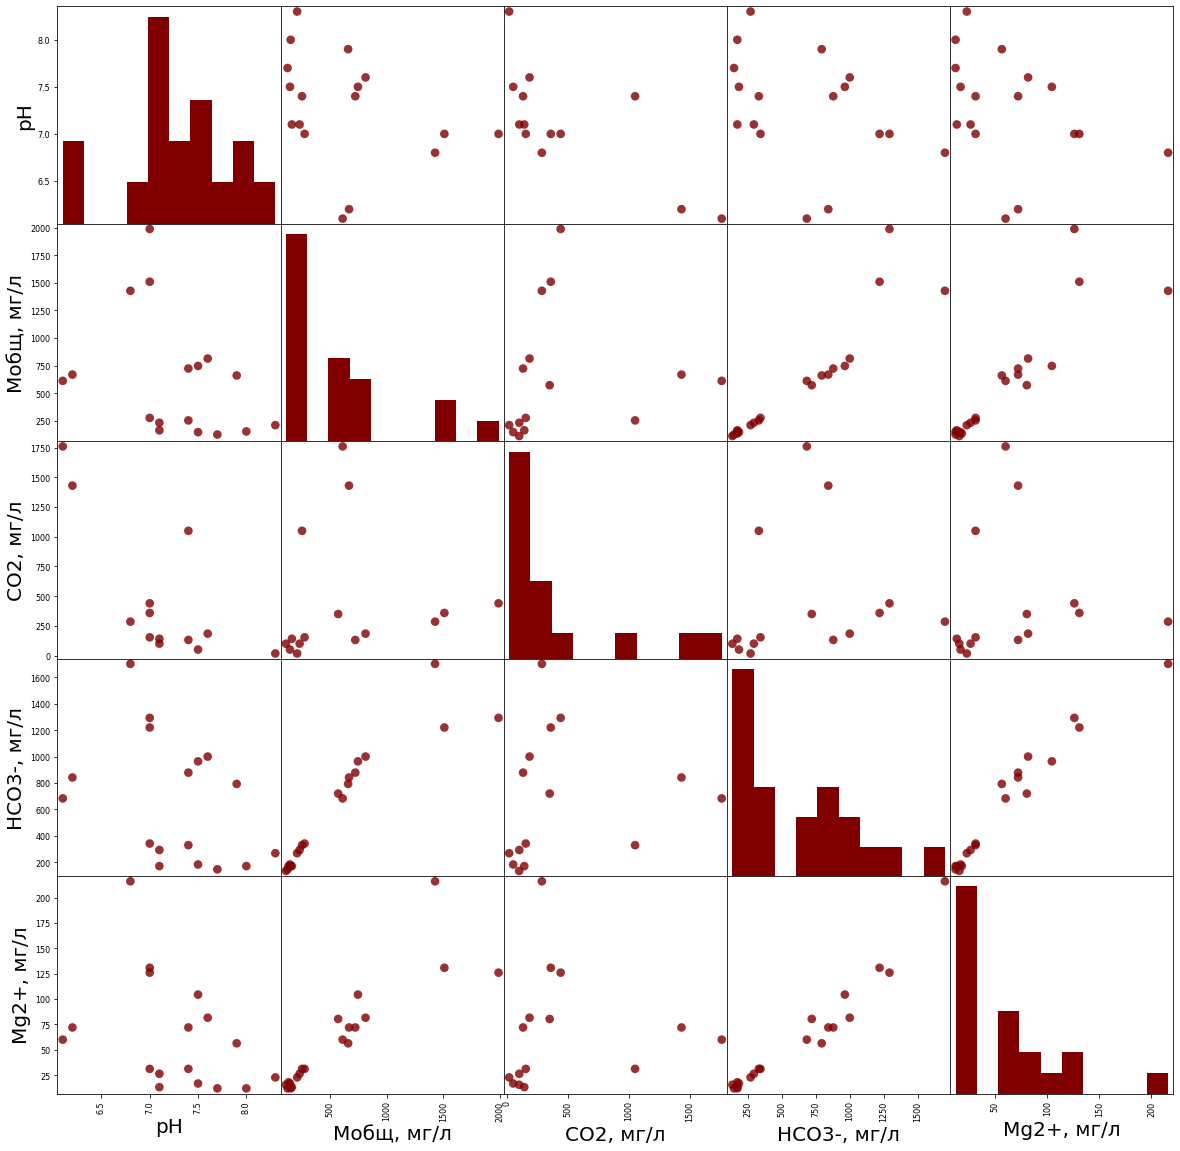

In [71]:

scatter_matrix = pd.plotting.scatter_matrix(df.iloc[:,6:], diagonal='hist', color='maroon', alpha=0.8,figsize= (20,20),s=300,hist_kwds={'color':['maroon']})
#plt.matshow(df.iloc[:,6:].corr())
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)
intersection_matrix = df.iloc[:,6:].corr()
#f = plt.figure(figsize=(20, 20))
#plt.matshow(df.iloc[:,6:].corr(), fignum=f.number,cmap='seismic')
#plt.xticks(range(df.iloc[:,6:].shape[1]), df.iloc[:,6:].columns, fontsize=20, rotation=45)
#plt.yticks(range(df.iloc[:,6:].shape[1]), df.iloc[:,6:].columns, fontsize=20)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
intersection_matrix 
#plt.title('Correlation Matrix', fontsize=16);


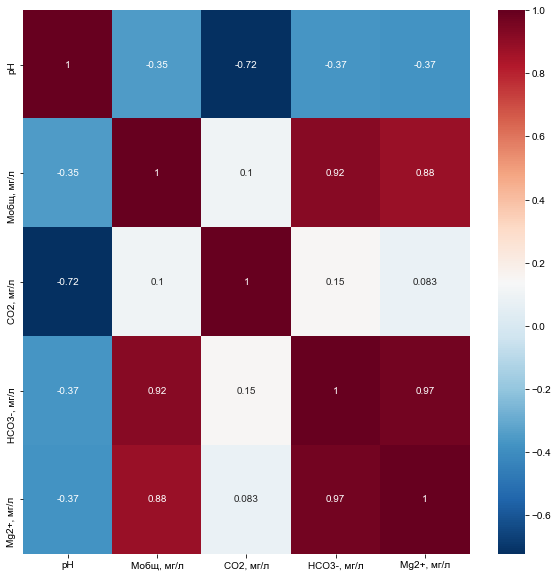

In [72]:
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 10,
       'font.size': 10,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 10,
       'xtick.labelsize': 10,
       'ytick.labelsize': 10,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
import seaborn as sn
#corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sn.heatmap(intersection_matrix, annot=True, cmap = 'RdBu_r')

plt.show()

In [73]:
df['Мобщ, мг/л'].max()


1987.0

In [74]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df['Мобщ, мг/л'].max()*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = df['НСО3-, мг/л'].max()*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = df['Mg2+, мг/л'].max()*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer

,share,Минерализация,"НСО3-, мг/л","Mg2+, мг/л"
0,0.00,113.00,134.200,12.00
1,0.01,131.74,149.878,14.04
2,0.02,150.48,165.556,16.08
3,0.03,169.22,181.234,18.12
4,0.04,187.96,196.912,20.16
...,...,...,...,...
96,0.96,1912.04,1639.288,207.84
97,0.97,1930.78,1654.966,209.88
98,0.98,1949.52,1670.644,211.92
99,0.99,1968.26,1686.322,213.96


In [75]:
pd.options.display.max_rows = 101

In [76]:
NaN = np.nan
mixer["Минерализация_данные"] = NaN
mixer["Минерализация_номер"] = NaN
mixer["НСО3-_данные"] = NaN
mixer["НСО3-_номер"] = NaN
mixer["Mg_данные"] = NaN
mixer["Mg_номер"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
            mixer["Минерализация_данные"][j] = value
            mixer["Минерализация_номер"][j] = df['№ пп'][x]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
            mixer["НСО3-_данные"][j] = value
            mixer["НСО3-_номер"][j] = df['№ пп'][x]
            break
#mixer
            

1987.0
814.6
669.0
1427.6
254.6
233.4
211.6
148.3
661.1
127.0
164.9
1509.5
724.1
612.5
277.3
573.2
113.0
154.6
747.5
136.2
1293.0
1000.0
841.8
1702.0
329.4
292.8
268.4
183.0
793.0
146.4
170.8
1220.0
878.4
683.2
341.6
719.8
134.2
170.8
963.8
170.8


In [77]:
mixer['Минерализация'][1]

131.74

In [78]:
NaN = np.nan
mixer["Минерализация_данные"] = NaN
mixer

,share,Минерализация,"НСО3-, мг/л","Mg2+, мг/л",Минерализация_данные,Минерализация_номер,НСО3-_данные,НСО3-_номер,Mg_данные,Mg_номер
0,0.00,113.00,134.200,12.00,NaN,17.0,134.2,17.0,NaN,NaN
1,0.01,131.74,149.878,14.04,NaN,10.0,146.4,10.0,NaN,NaN
2,0.02,150.48,165.556,16.08,NaN,20.0,NaN,NaN,NaN,NaN
3,0.03,169.22,181.234,18.12,NaN,18.0,170.8,20.0,NaN,NaN
4,0.04,187.96,196.912,20.16,NaN,NaN,183.0,8.0,NaN,NaN
5,0.05,206.70,212.590,22.20,NaN,NaN,NaN,NaN,NaN,NaN
6,0.06,225.44,228.268,24.24,NaN,7.0,NaN,NaN,NaN,NaN
7,0.07,244.18,243.946,26.28,NaN,6.0,NaN,NaN,NaN,NaN
8,0.08,262.92,259.624,28.32,NaN,5.0,NaN,NaN,NaN,NaN
9,0.09,281.66,275.302,30.36,NaN,15.0,268.4,7.0,NaN,NaN


In [79]:

NaN = np.nan

df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,№ пп,Дата отбора,Скважина,Залежь,X,Y,рН,"Мобщ, мг/л","СО2, мг/л","НСО3-, мг/л","Mg2+, мг/л",Минерализация_доля,НСО3-_доля,Mg_доля
0,1,1985-07-10,2758,3,47955.568,11564.599,7.0,1987.0,440.0,1293.0,126.0,1.00,0.74,0.56
1,2,1985-07-21,2883,5,48810.967,14285.493,7.6,814.6,185.0,1000.0,81.6,0.38,0.56,0.35
2,3,1986-07-16,2937,4,47912.326,12994.500,6.2,669.0,1430.0,841.8,72.0,0.30,0.46,0.30
3,4,1986-07-20,3472,3,47963.612,11575.829,6.8,1427.6,286.0,1702.0,216.0,0.71,1.00,1.00
4,5,1986-07-21,2888,5,49621.931,13729.943,7.4,254.6,1050.0,329.4,31.2,0.08,0.13,0.10
5,6,1987-07-14,3473,3,47543.477,11855.289,7.1,233.4,101.0,292.8,26.4,0.07,0.11,0.08
6,7,1987-07-14,3572,5,49140.263,14070.075,8.3,211.6,18.0,268.4,22.8,0.06,0.09,0.06
7,8,1987-07-14,3671,5,49142.312,14076.299,7.5,148.3,51.0,183.0,16.8,0.02,0.04,0.03
8,9,1985-05-28,2823,3,46607.911,12127.358,7.9,661.1,NaN,793.0,56.4,0.30,0.43,0.22
9,10,1986-05-20,3283,7,50426.837,16797.973,7.7,127.0,NaN,146.4,12.0,0.01,0.01,0.00


C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


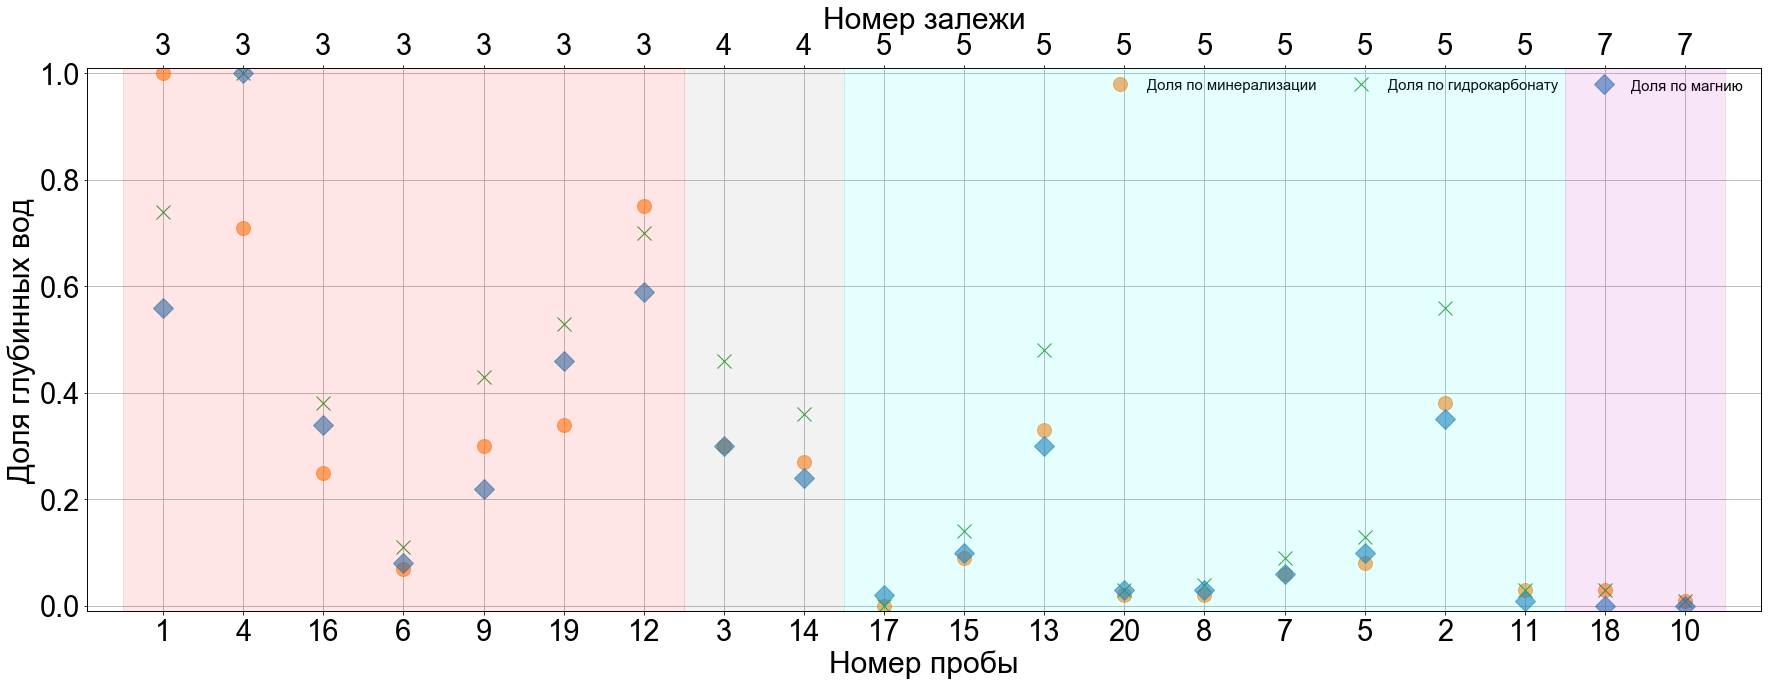

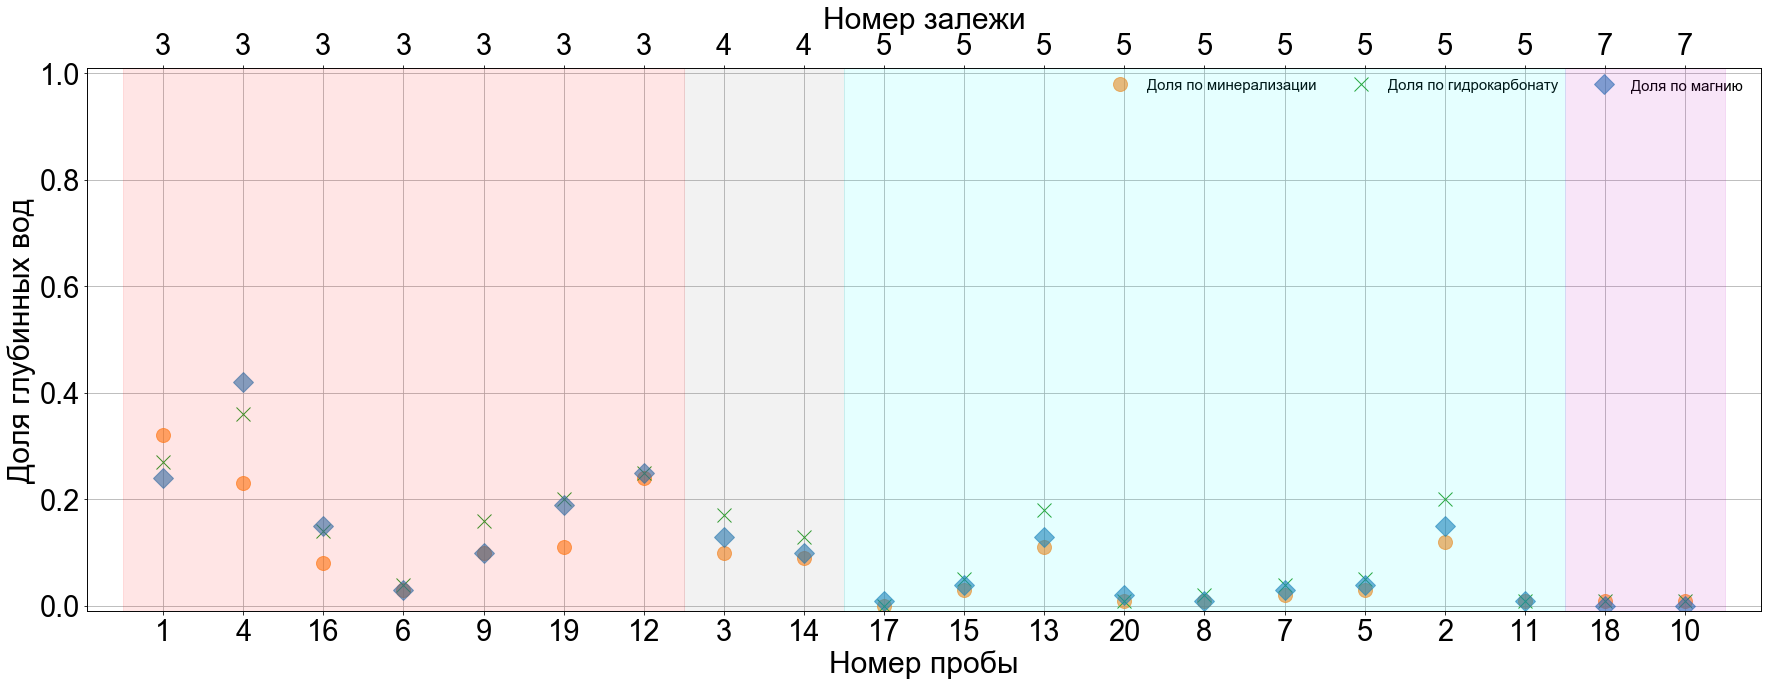

In [80]:
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
probNum.insert(0, 0) 
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
###################################################################################################
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = 6000*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = 4500*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = 500*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan

df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
probNum.insert(0, 0) 
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
#ax.set_xticks(range(2,21))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [81]:
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
zaleg.insert(0, 0)

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


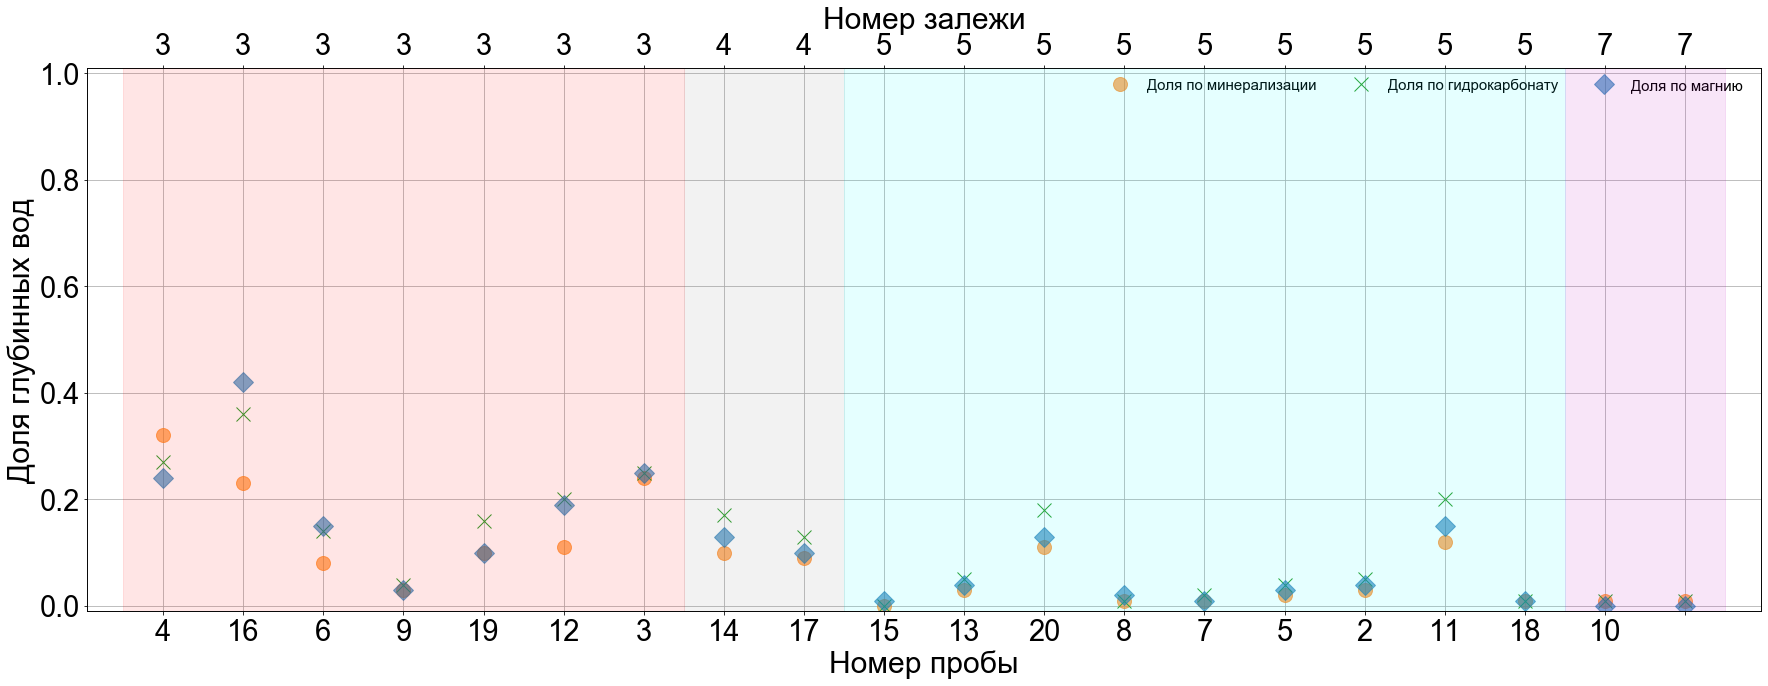

In [82]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = 6000*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = 4500*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = 500*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan

df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax2.set_xticks(np.arange(1,20,1))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [83]:
df1 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 2)

In [84]:
NaN = np.nan
df_min = df1.drop(df1[(df1['Unnamed: 4'] == 'мг-экв') | (df1['Unnamed: 4'] == '%-экв') | (df1['Unnamed: 4'] == NaN)].index)
df_min = df_min.drop(df.index[0])
df_min= df_min.reset_index(drop=True)

In [85]:
df_min= df_min.rename(columns={"Unnamed: 1": "Sample №", "Unnamed: 2": "Well №","Unnamed: 2": "Well №","Unnamed: 3": "Date","Unnamed: 21": "TDS"}, errors="raise")


In [86]:
df_min = df_min.drop(['Unnamed: 0','Итого','Итого.1','Unnamed: 15','Unnamed: 17'], axis =1)


In [87]:
df2 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 1,sheet_name = 1 )
NaN = np.nan
df_min2 = df2.drop(df2[(df2['Unnamed: 4'] == 'мг-экв') | (df2['Unnamed: 4'] == '%-экв') | (df2['Unnamed: 4'] == NaN)].index)
df_min2 = df_min2.drop(df2.index[0])
df_min2= df_min2.reset_index(drop=True)
df_min2= df_min2.rename(columns={"Unnamed: 1": "Sample №", "Unnamed: 2": "Well №","Unnamed: 2": "Well №","Unnamed: 3": "Date","Unnamed: 21": "TDS"}, errors="raise")
df_min2 = df_min2.drop(['Unnamed: 0','Итого','Итого.1','Unnamed: 15','Unnamed: 17'], axis =1)


In [88]:
df_hyagda = df_min.append(df_min2, ignore_index=True)


In [89]:
df_hyagda = df_hyagda.drop(df2.index[21])


C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py

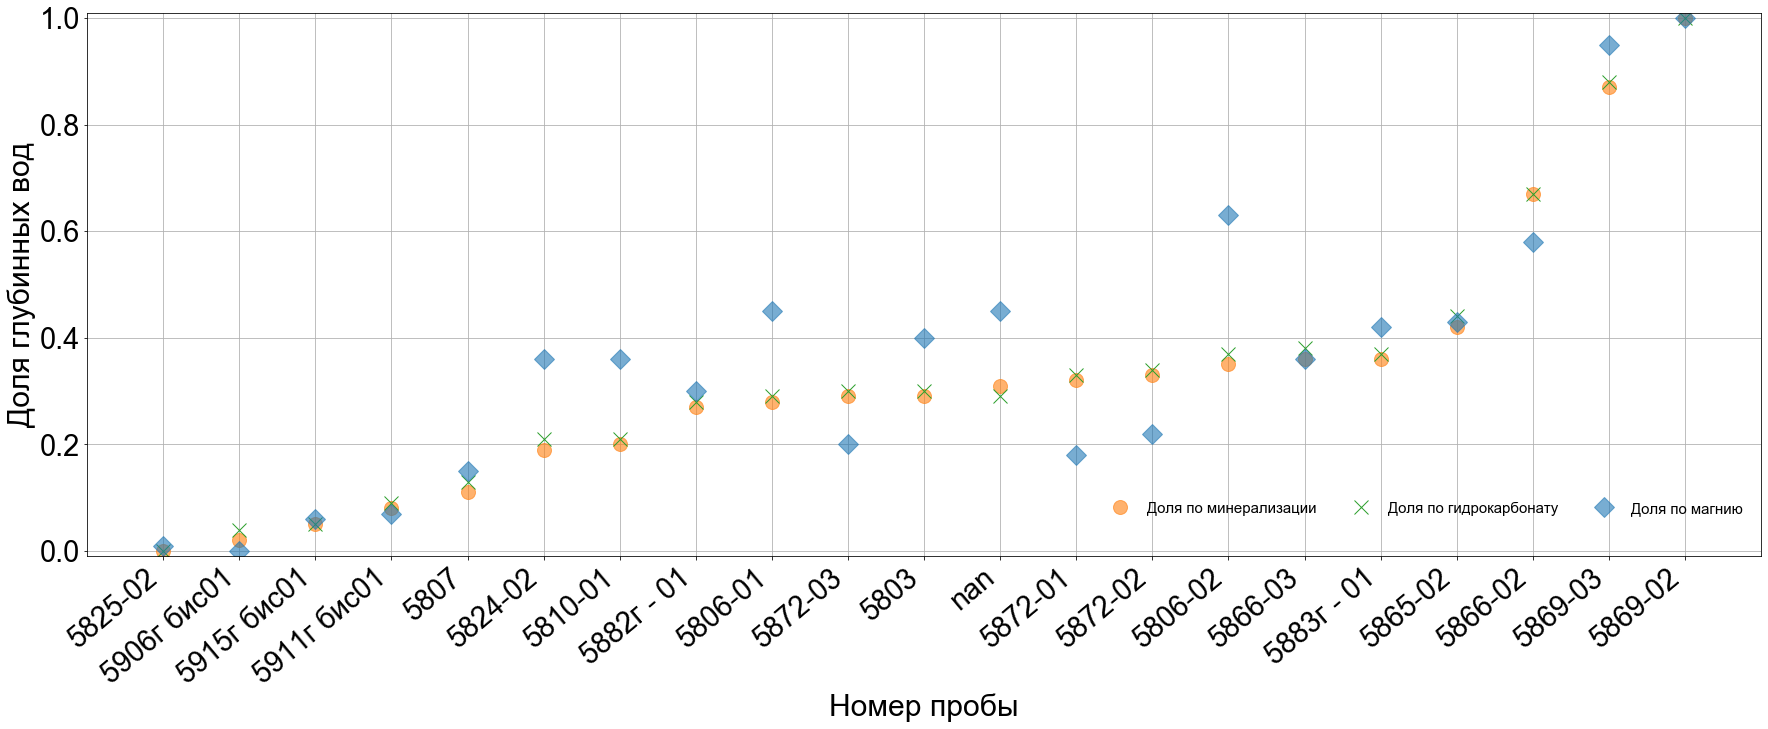

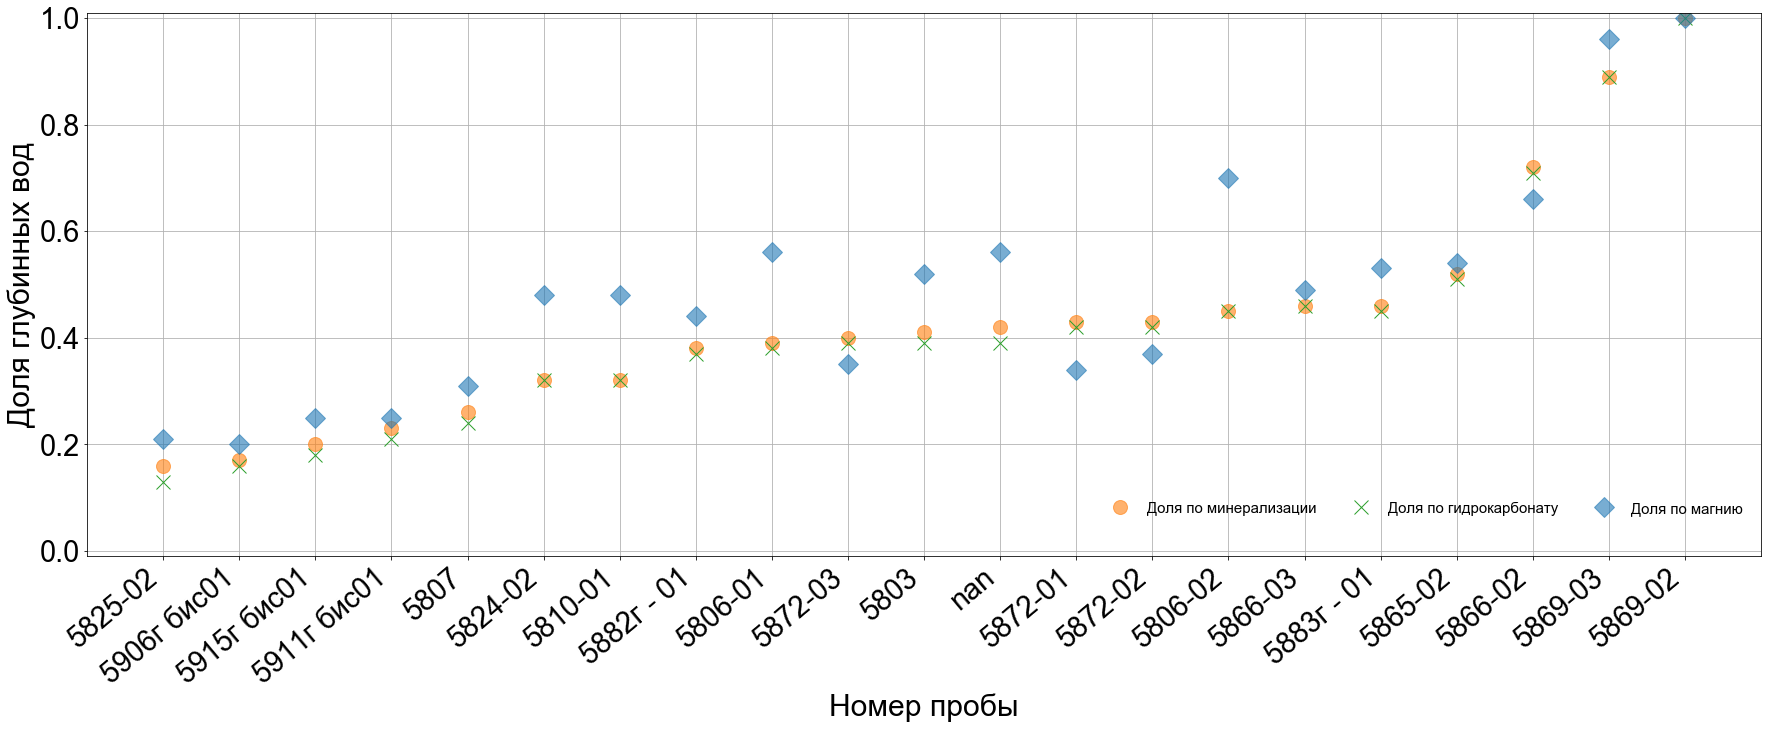

In [90]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df_hyagda['TDS'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df_hyagda['HCO3-'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df_hyagda['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 

mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan

df_hyagda["Минерализация_доля"] = NaN
df_hyagda["НСО3-_доля"] = NaN
df_hyagda["Mg_доля"] = NaN
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Mg_доля"][x] = mixer['share'][j]
            break
df_hyagda
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_hyagda.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_hyagda.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_hyagda.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_hyagda.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(probNum)))
ax.set_xticklabels(probNum,rotation=40,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.05), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 

mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan

df_hyagda["Минерализация_доля"] = NaN
df_hyagda["НСО3-_доля"] = NaN
df_hyagda["Mg_доля"] = NaN
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Mg_доля"][x] = mixer['share'][j]
            break
df_hyagda
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_hyagda.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_hyagda.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_hyagda.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_hyagda.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(probNum)))
ax.set_xticklabels(probNum,rotation=40,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.05), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


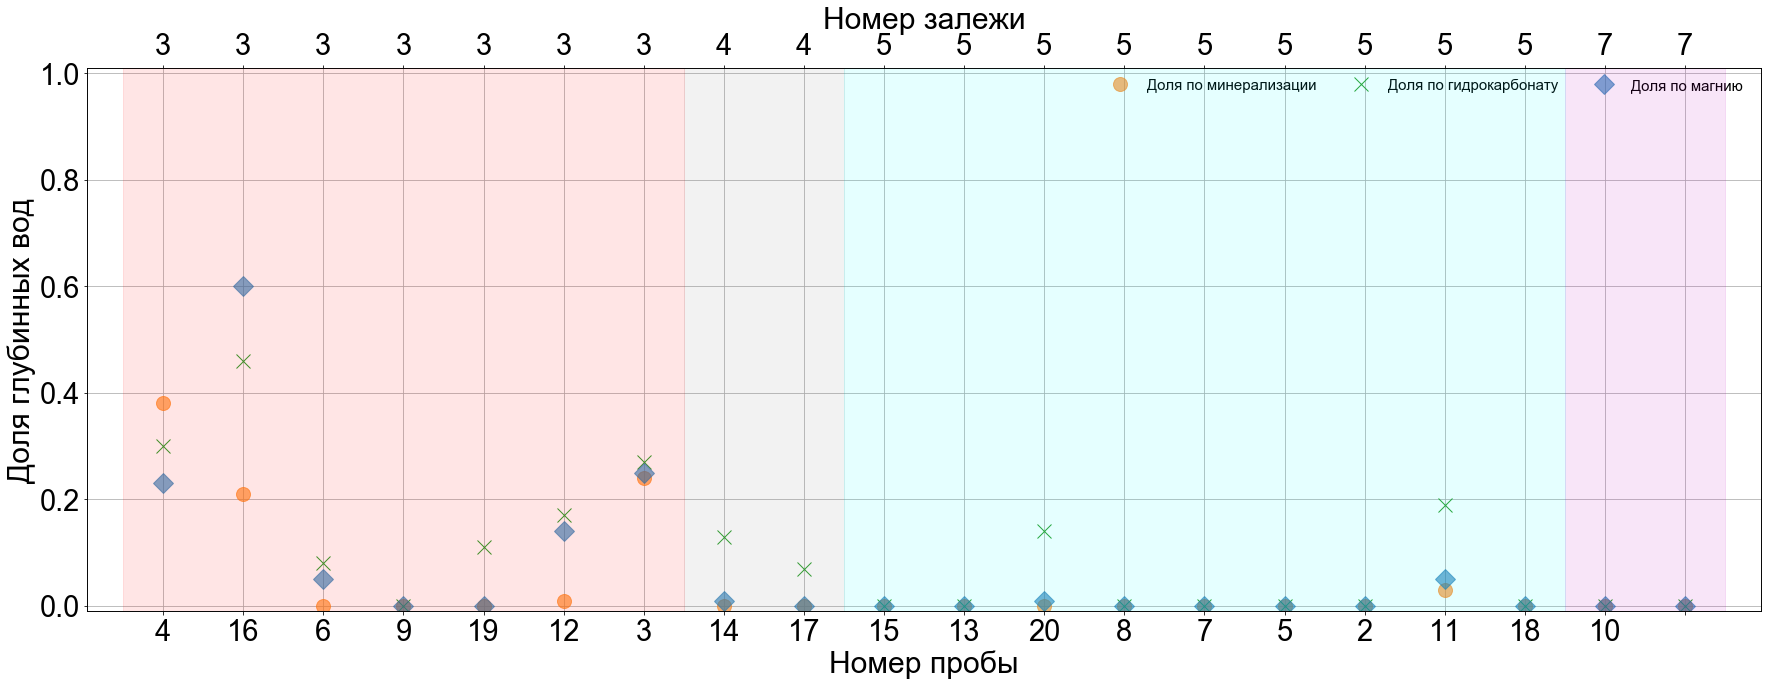

In [91]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df_hyagda['TDS'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df_hyagda['HCO3-'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df_hyagda['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan

df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax2.set_xticks(np.arange(1,20,1))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)

ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [92]:
df3 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 0,sheet_name = 3, dtype = {'№№ проб': 'object' } )

#df3

In [93]:
df3=df3.rename(columns={'М общ, мг/л':'TDS','№№ проб':'Sample №','Дата отбора':'Date','НСО3-':'HCO3-','Са2+':'Ca2+','рН':'pH'})  
df_vnipipt = df

df_vnipipt=df_vnipipt.rename(columns={'Мобщ, мг/л':'TDS','№ пп':'Sample №','Дата отбора':'Date','Залежь':'Zaleg','Скважина':'Well №','НСО3-, мг/л':'HCO3-','Mg2+, мг/л':'Mg2+','рН':'pH'}) 
#df_vnipipt
#df_sum = pd.concat([df_sum, df_vnipipt])
#df_sum

In [94]:
df_sum = pd.concat([df_hyagda, df3,df_vnipipt.drop(columns=['X', 'Y'])])
df_sum= df_sum.reset_index(drop=True)


In [95]:
df_sum = df_sum.replace(',','.',regex=True)
#df_sum

In [96]:
#df['col'] = pd.to_numeric(df['col'], errors='ignore')
pd.options.display.max_rows = 999
df_sum = df_sum.replace(',','.',regex=True)
df_sum['TDS'] = df_sum['TDS'].replace('-',np.nan,regex=True)
df_sum["TDS"] = df_sum.TDS.astype(float) 
df_sum["HCO3-"] = df_sum['HCO3-'].astype(float)
df_sum["Mg2+"] = df_sum['Mg2+'].astype(float)
df_sum["(Na+K)+"] = df_sum['(Na+K)+'].astype(float)
df_sum["Cl-"] = df_sum['Cl-'].astype(float)

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


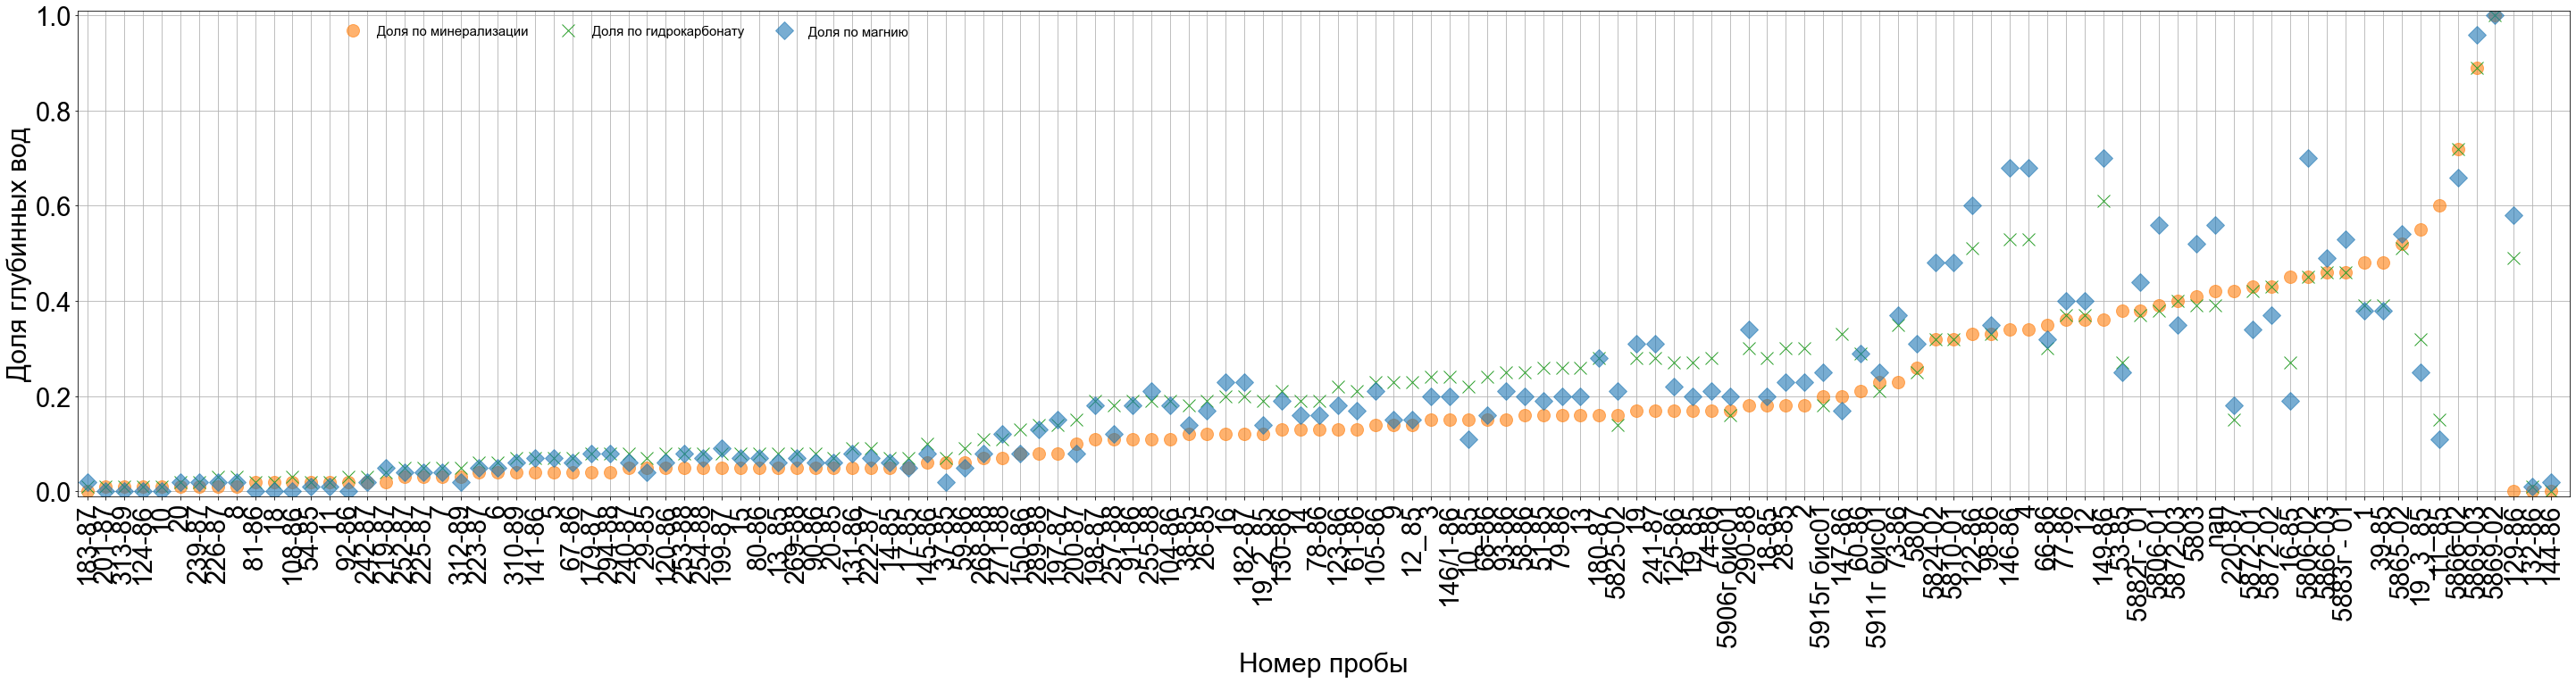

In [97]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_sum['TDS'].max()*mixer['share'][x] + df_sum['TDS'].min()*(1-mixer['share'][x])
    c = df_sum['HCO3-'].max()*mixer['share'][x] + df_sum['HCO3-'].min()*(1-mixer['share'][x])
    d = df_sum['Mg2+'].max()*mixer['share'][x] + df_sum['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 

mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan

df_sum["Минерализация_доля"] = NaN
df_sum["НСО3-_доля"] = NaN
df_sum["Mg_доля"] = NaN
for x in range (0,len(df_sum.index)):
    value = df_sum['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Mg_доля"][x] = mixer['share'][j]
            break
df_sum
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [50, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_sum.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_sum.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_sum.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_sum.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(df_sum.sort_values('TDS')['Sample №'])))
ax.set_xticklabels(df_sum.sort_values('TDS')['Sample №'],rotation=90)#,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.1,0.92), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
ax.set_xlim(0.5,len(df_sum.sort_values('TDS')['Sample №'])+0/5)
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [98]:
df_sum['Mg_доля'].max()


1.0

In [99]:
df_sum['(Na+K)+']=df_sum['(Na+K)+'].astype(float)
df_sum['Cl-']=df_sum['Cl-'].astype(float)
#df_sum.sort_values('TDS')['Минерализация_доля']


In [100]:
pd.options.display.max_rows= 150
#df_sum

In [101]:
#a= df_sum['Местоположение отбора пробы'].str.split(" |\.")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.lstrip('скв.')
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.replace(".","")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.replace(",","")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.lstrip(' ')
a = df_sum['Местоположение отбора пробы'].str.split(' ',expand=True)
a
df_sum['Zaleg'] = a[2]
df_sum['Glubina']=  a[5]
df_sum['Well №'] = df_sum['Well №'].fillna(a[0])
df_sum['pH'] = df_sum['pH'].fillna(df_sum['pH'])
df_sum['Ca2+'] = df_sum['Ca2+'].fillna(df_sum['Ca2+'])
df_sum['(Na+K)+'] = df_sum['(Na+K)+'].fillna(df_sum['Na+']+df_sum['К+'])
#df_sum

In [102]:
#df_sum=df_sum.drop(columns=['рН','Са2+'])
df_sum['pH'] = df_sum['pH'].replace("-", NaN)
#df_sum

In [103]:
df_sum['Well №']=df_sum['Well №'].astype(str)
df_sum['Well №'] = df_sum['Well №'].str.rstrip('бис')
df_sum['Well №'] = df_sum['Well №'].str.rstrip('г')
df_sum['Well №'] = df_sum['Well №'].str.rstrip('г ')
df_sum

,Sample №,Well №,Date,Unnamed: 4,HCO3-,CO32-,SO42-,Cl-,Ca2+,Mg2+,...,Минерализация_доля,НСО3-_доля,Mg_доля,№№ п/п,Местоположение отбора пробы,"Еh, мв",(Na+K)+,Zaleg,"СО2, мг/л",Glubina
0,5865-02,5865,2012-03-05 00:00:00,мг/дм3,1653.57,0.00,10.09,13.12,119.24,174.39,...,0.52,0.51,0.54,NaN,NaN,NaN,169.28,NaN,NaN,NaN
1,5866-02,5866,2012-03-11 00:00:00,мг/дм3,2269.84,0.00,14.41,15.95,226.45,210.85,...,0.72,0.72,0.66,NaN,NaN,NaN,207.69,NaN,NaN,NaN
2,5866-03,nan,2012-06-09 00:00:00,мг/дм3,1507.13,0.00,0,11.70,143.29,157.37,...,0.46,0.46,0.49,NaN,NaN,NaN,106.97,NaN,NaN,NaN
3,5869-02,5869,2012-03-15 00:00:00,мг/дм3,3142.39,0.00,12.97,26.24,229.46,314.75,...,1.00,1.00,1.00,NaN,NaN,NaN,347.96,NaN,NaN,NaN
4,5869-03,nan,2012-05-31 00:00:00,мг/дм3,2806.80,0.00,0,23.40,177.35,300.17,...,0.89,0.89,0.96,NaN,NaN,NaN,301.79,NaN,NaN,NaN
5,5872-01,5872,2012-03-19 00:00:00,мг/дм3,1369.84,0.00,0,9.93,127.25,113.02,...,0.43,0.42,0.34,NaN,NaN,NaN,162.86,NaN,NaN,NaN
6,5872-02,nan,9-11.04.2012,мг/дм3,1397.30,0.00,0,9.22,121.24,122.13,...,0.43,0.43,0.37,NaN,NaN,NaN,160.95,NaN,NaN,NaN
7,5872-03,nan,2012-06-04 00:00:00,мг/дм3,1305.77,0.00,0,10.64,109.22,117.27,...,0.40,0.40,0.35,NaN,NaN,NaN,148.20,NaN,NaN,NaN
8,NaN,5850,11-12.02.2012,мг/дм3,1278.31,0.00,99.42,11.70,43.29,180.34,...,0.42,0.39,0.56,NaN,NaN,NaN,138.24,NaN,NaN,NaN
9,5824-02,5824,9-10.10.2011,мг/дм3,1067.80,0.00,20.17,13.12,56.11,156.77,...,0.32,0.32,0.48,NaN,NaN,NaN,60.72,NaN,NaN,NaN


C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py

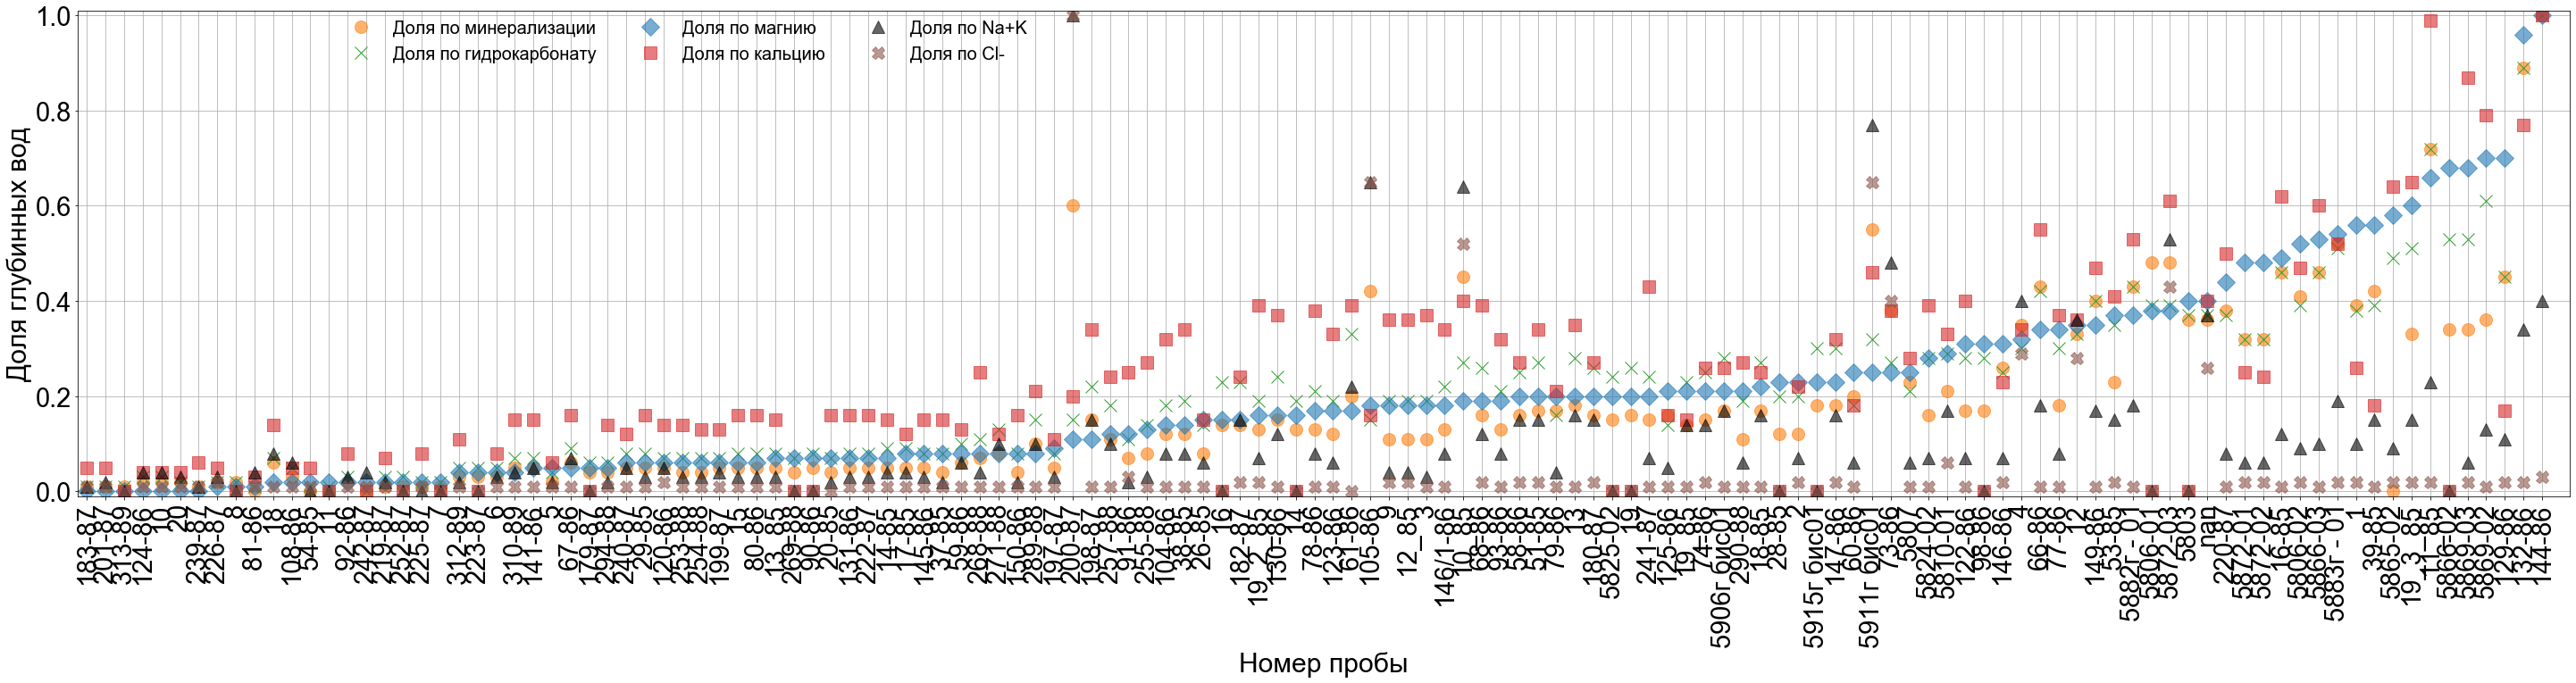

In [104]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
mixer_temp3 = []
mixer_temp4 = []
mixer_temp5 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_sum['TDS'].max()*mixer['share'][x] + df_sum['TDS'].min()*(1-mixer['share'][x])
    c = df_sum['HCO3-'].max()*mixer['share'][x] + df_sum['HCO3-'].min()*(1-mixer['share'][x])
    d = df_sum['Mg2+'].max()*mixer['share'][x] + df_sum['Mg2+'].min()*(1-mixer['share'][x])
    z = df_sum['Ca2+'].max()*mixer['share'][x] + df_sum['Ca2+'].min()*(1-mixer['share'][x])
    e = df_sum['(Na+K)+'].max()*mixer['share'][x] + df_sum['(Na+K)+'].min()*(1-mixer['share'][x])
    w = df_sum['Cl-'].max()*mixer['share'][x] + df_sum['Cl-'].min()*(1-mixer['share'][x])
#    e = 300*mixer['share'][x] + df_sum['(Na+K)+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
    mixer_temp3.append(z)
    mixer_temp4.append(e)
    mixer_temp5.append(w)

mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer.insert(4,'Ca2+',mixer_temp3, True)
mixer.insert(5,'(Na+K)+',mixer_temp4, True)
mixer.insert(6,'Cl-',mixer_temp5, True)
mixer
NaN = np.nan

df_sum["Минерализация_доля"] = NaN
df_sum["НСО3-_доля"] = NaN
df_sum["Mg_доля"] = NaN
df_sum["Ca_доля"] = NaN
df_sum["(Na+K)+_доля"] = NaN
df_sum["Cl-_доля"] = NaN
for x in range (0,len(df_sum.index)):
    value = df_sum['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Mg_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Ca2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Ca2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Ca_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['(Na+K)+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['(Na+K)+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["(Na+K)+_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Cl-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Cl-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Cl-_доля"][x] = mixer['share'][j]
            break
df_sum
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 20,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [50, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }

rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_sum.sort_values('Mg2+')['Минерализация_доля'].tolist()
HCO3 = df_sum.sort_values('Mg2+')['НСО3-_доля'].tolist()
Mg = df_sum.sort_values('Mg2+')['Mg_доля'].tolist()
Ca = df_sum.sort_values('Mg2+')['Ca_доля'].tolist()
NaK = df_sum.sort_values('Mg2+')['(Na+K)+_доля'].tolist()
Cl = df_sum.sort_values('Mg2+')['Cl-_доля'].tolist()
probNum = df_sum.sort_values('Mg2+')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
lns4 = ax.plot(Ca,'s', alpha = 0.6, color = "tab:red",label = 'Доля по кальцию',markersize=14, linewidth='0' )
lns4 = ax.plot(NaK,'^', alpha = 0.6, color = "black",label = 'Доля по Na+K',markersize=14, linewidth='0' )
lns4 = ax.plot(Cl,'X', alpha = 0.6, color = "tab:brown",label = 'Доля по Cl-',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(df_sum.sort_values('TDS')['Sample №'])))
ax.set_xticklabels(df_sum.sort_values('TDS')['Sample №'],rotation=90)#,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.1,0.86), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
ax.set_xlim(0.5,len(df_sum.sort_values('TDS')['Sample №'])+0.5)
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
#df_sum

In [105]:
#df_sum

In [106]:
df_sum['Well №']=df_sum['Well №'].astype(float)
df_sum['Well №']=df_sum['Well №'].fillna(method='ffill')
df_sum['Well №'].fillna(method='ffill')
df_sum['Well №']=df_sum['Well №'].astype(int)

In [107]:
df_coord = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Хиагда_МГУ\\Отчет_ВНИПИПТ\\2 этап\\Приложения\\Приложение А.xls', header = 0,sheet_name = 2, usecols = 'A,C,D,E')#dtype = {'№№ проб': 'object' } ) 
df_coord
df_coord= df_coord.rename(columns={"Скважина": "Well №"})
df_sum['Well №']=df_sum['Well №'].astype(str)
df_coord['Well №']=df_coord['Well №'].astype(str)
df_coord

,Well №,X,Y,Z
0,97,50382.7,17216.6,1231.02
1,98,48286.5,14813.9,1236.89
2,100,49394.8,16917.3,1236.87
3,109,48772.4,16954.8,1228.05
4,110,49135.4,16926.5,1233.98
...,...,...,...,...
2393,7-62-НБ,,,
2394,85-бис,,,
2395,86 бис2,48287.9,14743.7,
2396,87-бис,,,


In [108]:
df_coord['Well №']=df_coord['Well №'].astype(str)
df_coord['Well №'] = df_coord['Well №'].str.rstrip('бис')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('г')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('г ')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('g ')
df_coord['Well №'] = df_coord['Well №'].str.rstrip(' g')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('g')
# df_coord['Well №'] = df_sum['Well №'].str.replace("г","")
#df_coord['Well №'] = df_sum['Well №'].str.replace("g","")
df_coord['Well №'] = df_coord['Well №'].str.replace(" ","")

df_coord

,Well №,X,Y,Z
0,97,50382.7,17216.6,1231.02
1,98,48286.5,14813.9,1236.89
2,100,49394.8,16917.3,1236.87
3,109,48772.4,16954.8,1228.05
4,110,49135.4,16926.5,1233.98
...,...,...,...,...
2393,7-62-НБ,,,
2394,85-,,,
2395,86бис2,48287.9,14743.7,
2396,87-,,,


In [109]:
"2758" in df_sum['Well №']
#pd.set_option('display.max_rows',10)
#df_coord['Well №']

False

In [110]:
#a = df_sum.merge(df_coord, how='left', on='Well №')
pd.set_option('display.max_columns', None)
df_sum = pd.merge(df_sum, df_coord, on = "Well №",how='left')
df_sum

,Sample №,Well №,Date,Unnamed: 4,HCO3-,CO32-,SO42-,Cl-,Ca2+,Mg2+,Na+,К+,"Жесткость, мг-экв/дм3","Feобщ., мг/дм3","U, мкг/л",pH,TDS,Минерализация_доля,НСО3-_доля,Mg_доля,№№ п/п,Местоположение отбора пробы,"Еh, мв",(Na+K)+,Zaleg,"СО2, мг/л",Glubina,Ca_доля,(Na+K)+_доля,Cl-_доля,X,Y,Z
0,5865-02,5865,2012-03-05 00:00:00,мг/дм3,1653.57,0.00,10.09,13.12,119.24,174.39,157.94,11.34,20.30,0.69,>500.0,NaN,2140.0,0.52,0.51,0.54,NaN,NaN,NaN,169.28,NaN,NaN,NaN,0.52,0.19,0.02,45639.8,10252.4,1215.4
1,5866-02,5866,2012-03-11 00:00:00,мг/дм3,2269.84,0.00,14.41,15.95,226.45,210.85,199.09,8.60,28.65,2.55,>500.0,7.4,2945.0,0.72,0.72,0.66,NaN,NaN,NaN,207.69,NaN,NaN,NaN,0.99,0.23,0.02,45616.1,10270.3,1214
2,5866-03,5866,2012-06-09 00:00:00,мг/дм3,1507.13,0.00,0,11.70,143.29,157.37,99.54,7.43,20.10,0.99,215.11,7.26,1926.0,0.46,0.46,0.49,NaN,NaN,NaN,106.97,NaN,NaN,NaN,0.62,0.12,0.01,45616.1,10270.3,1214
3,5869-02,5869,2012-03-15 00:00:00,мг/дм3,3142.39,0.00,12.97,26.24,229.46,314.75,334.27,13.69,37.35,4.31,205.95,7.14,4074.0,1.00,1.00,1.00,NaN,NaN,NaN,347.96,NaN,NaN,NaN,1.00,0.40,0.03,45271.3,10374.1,1199
4,5869-03,5869,2012-05-31 00:00:00,мг/дм3,2806.80,0.00,0,23.40,177.35,300.17,289.67,12.12,33.55,4.15,135.39,7.2,3610.0,0.89,0.89,0.96,NaN,NaN,NaN,301.79,NaN,NaN,NaN,0.77,0.34,0.02,45271.3,10374.1,1199
5,5872-01,5872,2012-03-19 00:00:00,мг/дм3,1369.84,0.00,0,9.93,127.25,113.02,154.26,8.60,15.65,2.09,2.09,7.28,1783.0,0.43,0.42,0.34,NaN,NaN,NaN,162.86,NaN,NaN,NaN,0.55,0.18,0.01,45182.1,10416.9,1195.7
6,5872-02,5872,9-11.04.2012,мг/дм3,1397.30,0.00,0,9.22,121.24,122.13,151.96,8.99,16.10,1.88,3.66,7.4,1811.0,0.43,0.43,0.37,NaN,NaN,NaN,160.95,NaN,NaN,NaN,0.53,0.18,0.01,45182.1,10416.9,1195.7
7,5872-03,5872,2012-06-04 00:00:00,мг/дм3,1305.77,0.00,0,10.64,109.22,117.27,141.16,7.04,15.10,1.36,3.17,7.65,1691.0,0.40,0.40,0.35,NaN,NaN,NaN,148.20,NaN,NaN,NaN,0.47,0.17,0.01,45182.1,10416.9,1195.7
8,NaN,5850,11-12.02.2012,мг/дм3,1278.31,0.00,99.42,11.70,43.29,180.34,126.90,11.34,17.00,<0.10,1002.68,NaN,1751.0,0.42,0.39,0.56,NaN,NaN,NaN,138.24,NaN,NaN,NaN,0.18,0.15,0.01,48095.3,11390.4,1248.96
9,5824-02,5824,9-10.10.2011,мг/дм3,1067.80,0.00,20.17,13.12,56.11,156.77,47.82,12.90,15.70,1.14,>500.0,NaN,1375.0,0.32,0.32,0.48,NaN,NaN,NaN,60.72,NaN,NaN,NaN,0.24,0.06,0.02,46541.1,12232.7,1221.73


In [111]:
df_sum['Well №']=df_sum['Well №'].astype(str)
df_coord['Well №']=df_coord['Well №'].astype(str)

In [112]:
5865 in df_coord['Well №']

False

In [113]:
zalegy = gpd.read_file('D:\\Kortunov\\transfer\\Hyagda\\maps_test\\zalegy.shp') 
zalegy.shape
#df_sum

(13, 2)

In [114]:
#df_sum

In [115]:
#df_vnipipt
df_glub = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\Приложение А 2_фильтры.xls', header = 0,sheet_name = 2, usecols = 'A,S,T,F,H,I,J')#dtype = {'№№ проб': 'object' } ) 

df_glub= df_glub.rename(columns={"Скважина": "Well №"})
df_sum['Well №']=df_sum['Well №'].astype(str)
df_glub['Well №']=df_glub['Well №'].astype(str)
df_glub
df_glub['Well №'] = df_glub['Well №'].str.rstrip('бис')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('г')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('г ')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('g ')
df_glub['Well №'] = df_glub['Well №'].str.rstrip(' g')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('g')
# # df_coord['Well №'] = df_sum['Well №'].str.replace("г","")
# #df_coord['Well №'] = df_sum['Well №'].str.replace("g","")
df_glub['Well №'] = df_glub['Well №'].str.replace(" ","")
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м [Пешков, 1993]'])
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м (разрезы [Макшанинов, 2008])'])
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м (разрезы [Польский, 2013])'])
df_glub = df_glub.drop(columns=['А.О. статического уровня, м (паспорт скважины)', 'А.О. статического уровня, м [Пешков, 1993]','А.О. статического уровня, м (разрезы [Макшанинов, 2008])','А.О. статического уровня, м (разрезы [Польский, 2013])'])
df_glub['А.О. начала фильтра (1)']=df_glub['А.О. начала фильтра (1)'].astype(str)
df_glub['А.О.конца фильтра (1)']=df_glub['А.О.конца фильтра (1)'].astype(str)
df_glub['А.О. начала фильтра (1)'] = df_glub['А.О. начала фильтра (1)'].str.lstrip('/')
df_glub['А.О.конца фильтра (1)'] = df_glub['А.О.конца фильтра (1)'].str.lstrip('/')
df_glub['А.О. начала фильтра (1)']=df_glub['А.О. начала фильтра (1)'].astype(float)
df_glub['А.О.конца фильтра (1)']=df_glub['А.О.конца фильтра (1)'].astype(float)
df_glub['А.О. Центра фильтра'] = (df_glub['А.О.конца фильтра (1)']+df_glub['А.О. начала фильтра (1)'])/2
df_glub = df_glub.drop(columns=['А.О.конца фильтра (1)','А.О. начала фильтра (1)'])
df_glub

,Well №,A.O Уровни,А.О. Центра фильтра
0,97,NaN,NaN
1,98,NaN,NaN
2,100,NaN,NaN
3,109,NaN,NaN
4,110,NaN,NaN
...,...,...,...
2393,7-62-НБ,NaN,134.10
2394,85-,NaN,157.55
2395,86бис2,NaN,155.75
2396,87-,NaN,154.10


In [116]:
df_sum = pd.merge(df_sum, df_glub, on = "Well №",how='left')

In [117]:
pd.set_option('display.max_rows', 10)
#f_sum['Glubina']=df_sum['Glubina'].astype(float)
#f_sum['Glubina'][32] = 156
#f_sum['А.О. Центра фильтра'] = df_sum['А.О. Центра фильтра'].fillna(df_sum['Z']-df_sum['Glubina'])
#f_sum


In [118]:
#df_glub['А.О. начала фильтра (1)'].count()

In [ ]:
Python 3
Разбор данных по Хиагде

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker
import geopandas as gpd
%matplotlib inline
​
df = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\2 этап\\Приложения\\addonK.xlsx', header = 2)
df = df.replace(',','.',regex=True)
#df = [x.replace(',', '.') for x in df]
df.iloc[:,5:]= df.iloc[:,3:].astype(float)
df
#df = df.astype(float)
#df.apply(lambda x: x.str.replace(',','.'))
​
№ пп	Дата отбора	Скважина	Залежь	X	Y	рН	Мобщ, мг/л	СО2, мг/л	НСО3-, мг/л	Mg2+, мг/л
0	1	1985-07-10	2758	3	47955.568	11564.599	7.0	1987.0	440.0	1293.0	126.0
1	2	1985-07-21	2883	5	48810.967	14285.493	7.6	814.6	185.0	1000.0	81.6
2	3	1986-07-16	2937	4	47912.326	12994.500	6.2	669.0	1430.0	841.8	72.0
3	4	1986-07-20	3472	3	47963.612	11575.829	6.8	1427.6	286.0	1702.0	216.0
4	5	1986-07-21	2888	5	49621.931	13729.943	7.4	254.6	1050.0	329.4	31.2
5	6	1987-07-14	3473	3	47543.477	11855.289	7.1	233.4	101.0	292.8	26.4
6	7	1987-07-14	3572	5	49140.263	14070.075	8.3	211.6	18.0	268.4	22.8
7	8	1987-07-14	3671	5	49142.312	14076.299	7.5	148.3	51.0	183.0	16.8
8	9	1985-05-28	2823	3	46607.911	12127.358	7.9	661.1	NaN	793.0	56.4
9	10	1986-05-20	3283	7	50426.837	16797.973	7.7	127.0	NaN	146.4	12.0
10	11	1985-12-17	2931	5	48977.640	14201.013	7.1	164.9	142.0	170.8	13.2
11	12	1986-02-21	2758	3	47955.568	11564.599	7.0	1509.5	359.0	1220.0	130.8
12	13	1986-02-21	2883	5	48810.967	14285.493	7.4	724.1	132.0	878.4	72.0
13	14	1986-02-21	2937	4	47912.326	12994.500	6.1	612.5	1760.0	683.2	60.0
14	15	1986-02-22	2888	5	49621.931	13729.943	7.0	277.3	154.0	341.6	31.2
15	16	1987-01-27	3474	3	47867.425	11627.514	NaN	573.2	350.0	719.8	80.4
16	17	1987-01-27	3572	5	49140.263	14070.075	NaN	113.0	100.0	134.2	15.6
17	18	1986-02-22	3282	7	50628.214	16672.134	8.0	154.6	NaN	170.8	12.0
18	19	1987-12-03	3473	3	47543.477	11855.289	7.5	747.5	NaN	963.8	104.4
19	20	1987-12-03	3671	5	49142.312	14076.299	NaN	136.2	NaN	170.8	18.0
​
scatter_matrix = pd.plotting.scatter_matrix(df.iloc[:,6:], diagonal='hist', color='maroon', alpha=0.8,figsize= (20,20),s=300,hist_kwds={'color':['maroon']})
#plt.matshow(df.iloc[:,6:].corr())
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)
intersection_matrix = df.iloc[:,6:].corr()
#f = plt.figure(figsize=(20, 20))
#plt.matshow(df.iloc[:,6:].corr(), fignum=f.number,cmap='seismic')
#plt.xticks(range(df.iloc[:,6:].shape[1]), df.iloc[:,6:].columns, fontsize=20, rotation=45)
#plt.yticks(range(df.iloc[:,6:].shape[1]), df.iloc[:,6:].columns, fontsize=20)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
intersection_matrix 
#plt.title('Correlation Matrix', fontsize=16);
​
рН	Мобщ, мг/л	СО2, мг/л	НСО3-, мг/л	Mg2+, мг/л
рН	1.000000	-0.349614	-0.722260	-0.372412	-0.373340
Мобщ, мг/л	-0.349614	1.000000	0.101244	0.921407	0.881432
СО2, мг/л	-0.722260	0.101244	1.000000	0.148188	0.082648
НСО3-, мг/л	-0.372412	0.921407	0.148188	1.000000	0.969837
Mg2+, мг/л	-0.373340	0.881432	0.082648	0.969837	1.000000

​
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 10,
       'font.size': 10,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 10,
       'xtick.labelsize': 10,
       'ytick.labelsize': 10,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
import seaborn as sn
#corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sn.heatmap(intersection_matrix, annot=True, cmap = 'RdBu_r')
​
plt.show()

df['Мобщ, мг/л'].max()
​
1987.0
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df['Мобщ, мг/л'].max()*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = df['НСО3-, мг/л'].max()*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = df['Mg2+, мг/л'].max()*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
share	Минерализация	НСО3-, мг/л	Mg2+, мг/л
0	0.00	113.00	134.200	12.00
1	0.01	131.74	149.878	14.04
2	0.02	150.48	165.556	16.08
3	0.03	169.22	181.234	18.12
4	0.04	187.96	196.912	20.16
...	...	...	...	...
96	0.96	1912.04	1639.288	207.84
97	0.97	1930.78	1654.966	209.88
98	0.98	1949.52	1670.644	211.92
99	0.99	1968.26	1686.322	213.96
100	1.00	1987.00	1702.000	216.00
101 rows × 4 columns

pd.options.display.max_rows = 101
NaN = np.nan
mixer["Минерализация_данные"] = NaN
mixer["Минерализация_номер"] = NaN
mixer["НСО3-_данные"] = NaN
mixer["НСО3-_номер"] = NaN
mixer["Mg_данные"] = NaN
mixer["Mg_номер"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
            mixer["Минерализация_данные"][j] = value
            mixer["Минерализация_номер"][j] = df['№ пп'][x]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
            mixer["НСО3-_данные"][j] = value
            mixer["НСО3-_номер"][j] = df['№ пп'][x]
            break
#mixer
            
1987.0
814.6
669.0
1427.6
254.6
233.4
211.6
148.3
661.1
127.0
164.9
1509.5
724.1
612.5
277.3
573.2
113.0
154.6
747.5
136.2
1293.0
1000.0
841.8
1702.0
329.4
292.8
268.4
183.0
793.0
146.4
170.8
1220.0
878.4
683.2
341.6
719.8
134.2
170.8
963.8
170.8
mixer['Минерализация'][1]
131.74
NaN = np.nan
mixer["Минерализация_данные"] = NaN
mixer

​
NaN = np.nan
​
df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df

In [ ]:
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
probNum.insert(0, 0) 
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
###################################################################################################
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = 6000*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = 4500*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = 500*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan
​
df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
probNum.insert(0, 0) 
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
#ax.set_xticks(range(2,21))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [ ]:
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
zaleg.insert(0, 0)
​
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = 6000*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = 4500*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = 500*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan
​
df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax2.set_xticks(np.arange(1,20,1))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [ ]:
df1 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 2)
​
NaN = np.nan
df_min = df1.drop(df1[(df1['Unnamed: 4'] == 'мг-экв') | (df1['Unnamed: 4'] == '%-экв') | (df1['Unnamed: 4'] == NaN)].index)
df_min = df_min.drop(df.index[0])
df_min= df_min.reset_index(drop=True)
​
df_min= df_min.rename(columns={"Unnamed: 1": "Sample №", "Unnamed: 2": "Well №","Unnamed: 2": "Well №","Unnamed: 3": "Date","Unnamed: 21": "TDS"}, errors="raise")
​
df_min = df_min.drop(['Unnamed: 0','Итого','Итого.1','Unnamed: 15','Unnamed: 17'], axis =1)
​
df2 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 1,sheet_name = 1 )
NaN = np.nan
df_min2 = df2.drop(df2[(df2['Unnamed: 4'] == 'мг-экв') | (df2['Unnamed: 4'] == '%-экв') | (df2['Unnamed: 4'] == NaN)].index)
df_min2 = df_min2.drop(df2.index[0])
df_min2= df_min2.reset_index(drop=True)
df_min2= df_min2.rename(columns={"Unnamed: 1": "Sample №", "Unnamed: 2": "Well №","Unnamed: 2": "Well №","Unnamed: 3": "Date","Unnamed: 21": "TDS"}, errors="raise")
df_min2 = df_min2.drop(['Unnamed: 0','Итого','Итого.1','Unnamed: 15','Unnamed: 17'], axis =1)
​
df_hyagda = df_min.append(df_min2, ignore_index=True)
​
df_hyagda = df_hyagda.drop(df2.index[21])

In [ ]:
​

In [ ]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df_hyagda['TDS'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df_hyagda['HCO3-'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df_hyagda['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
​
mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan
​
df_hyagda["Минерализация_доля"] = NaN
df_hyagda["НСО3-_доля"] = NaN
df_hyagda["Mg_доля"] = NaN
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Mg_доля"][x] = mixer['share'][j]
            break
df_hyagda
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_hyagda.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_hyagda.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_hyagda.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_hyagda.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(probNum)))
ax.set_xticklabels(probNum,rotation=40,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.05), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df['Мобщ, мг/л'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df['НСО3-, мг/л'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df['Mg2+, мг/л'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
​
mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan
​
df_hyagda["Минерализация_доля"] = NaN
df_hyagda["НСО3-_доля"] = NaN
df_hyagda["Mg_доля"] = NaN
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_hyagda.index)):
    value = df_hyagda['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_hyagda["Mg_доля"][x] = mixer['share'][j]
            break
df_hyagda
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_hyagda.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_hyagda.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_hyagda.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_hyagda.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(probNum)))
ax.set_xticklabels(probNum,rotation=40,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.05), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

In [ ]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_hyagda['TDS'].max()*mixer['share'][x] + df_hyagda['TDS'].min()*(1-mixer['share'][x])
    c = df_hyagda['HCO3-'].max()*mixer['share'][x] + df_hyagda['HCO3-'].min()*(1-mixer['share'][x])
    d = df_hyagda['Mg2+'].max()*mixer['share'][x] + df_hyagda['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
mixer_temp
mixer.insert(1,'Минерализация',mixer_temp, True)
mixer.insert(2,'НСО3-, мг/л',mixer_temp1, True)
mixer.insert(3,'Mg2+, мг/л',mixer_temp2, True)
mixer
NaN = np.nan
​
df["Минерализация_доля"] = NaN
df["НСО3-_доля"] = NaN
df["Mg_доля"] = NaN
for x in range (0,len(df.index)):
    value = df['Мобщ, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Минерализация'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['НСО3-, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['НСО3-, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df.index)):
    value = df['Mg2+, мг/л'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+, мг/л'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df["Mg_доля"][x] = mixer['share'][j]
            break
df
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [30, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df.sort_values('Залежь')['Минерализация_доля'].tolist()
HCO3 = df.sort_values('Залежь')['НСО3-_доля'].tolist()
Mg = df.sort_values('Залежь')['Mg_доля'].tolist()
probNum = df.sort_values('Залежь')['№ пп'].tolist()
zaleg = df.sort_values('Залежь')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax2.set_xticks(np.arange(1,20,1))
ax.set_xticklabels(probNum)
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.60,0.93), loc="lower left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
​
ax.set_xlabel('Номер пробы')
########################################
ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
ax2.set_xticks(df['№ пп']-1)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(zaleg)
ax2.set_xlabel('Номер залежи')
ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

df3 = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для Василевского_Химия_ХРП\\Для Василевского\\ПРИЛ.148 Химсостав подземных вод.xlsx', header = 0,sheet_name = 3, dtype = {'№№ проб': 'object' } )
​
#df3
df3=df3.rename(columns={'М общ, мг/л':'TDS','№№ проб':'Sample №','Дата отбора':'Date','НСО3-':'HCO3-','Са2+':'Ca2+','рН':'pH'})  
df_vnipipt = df
​
df_vnipipt=df_vnipipt.rename(columns={'Мобщ, мг/л':'TDS','№ пп':'Sample №','Дата отбора':'Date','Залежь':'Zaleg','Скважина':'Well №','НСО3-, мг/л':'HCO3-','Mg2+, мг/л':'Mg2+','рН':'pH'}) 
#df_vnipipt
#df_sum = pd.concat([df_sum, df_vnipipt])
#df_sum
df_sum = pd.concat([df_hyagda, df3,df_vnipipt.drop(columns=['X', 'Y'])])
df_sum= df_sum.reset_index(drop=True)
​
df_sum = df_sum.replace(',','.',regex=True)
#df_sum
#df['col'] = pd.to_numeric(df['col'], errors='ignore')
pd.options.display.max_rows = 999
df_sum = df_sum.replace(',','.',regex=True)
df_sum['TDS'] = df_sum['TDS'].replace('-',np.nan,regex=True)
df_sum["TDS"] = df_sum.TDS.astype(float) 
df_sum["HCO3-"] = df_sum['HCO3-'].astype(float)
df_sum["Mg2+"] = df_sum['Mg2+'].astype(float)
df_sum["(Na+K)+"] = df_sum['(Na+K)+'].astype(float)
df_sum["Cl-"] = df_sum['Cl-'].astype(float)
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_sum['TDS'].max()*mixer['share'][x] + df_sum['TDS'].min()*(1-mixer['share'][x])
    c = df_sum['HCO3-'].max()*mixer['share'][x] + df_sum['HCO3-'].min()*(1-mixer['share'][x])
    d = df_sum['Mg2+'].max()*mixer['share'][x] + df_sum['Mg2+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
​
mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer
NaN = np.nan
​
df_sum["Минерализация_доля"] = NaN
df_sum["НСО3-_доля"] = NaN
df_sum["Mg_доля"] = NaN
for x in range (0,len(df_sum.index)):
    value = df_sum['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Mg_доля"][x] = mixer['share'][j]
            break
df_sum
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 15,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [50, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_sum.sort_values('TDS')['Минерализация_доля'].tolist()
HCO3 = df_sum.sort_values('TDS')['НСО3-_доля'].tolist()
Mg = df_sum.sort_values('TDS')['Mg_доля'].tolist()
probNum = df_sum.sort_values('TDS')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(df_sum.sort_values('TDS')['Sample №'])))
ax.set_xticklabels(df_sum.sort_values('TDS')['Sample №'],rotation=90)#,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.1,0.92), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
ax.set_xlim(0.5,len(df_sum.sort_values('TDS')['Sample №'])+0/5)
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()

In [ ]:

df_sum['(Na+K)+']=df_sum['(Na+K)+'].astype(float)
df_sum['Cl-']=df_sum['Cl-'].astype(float)
#df_sum.sort_values('TDS')['Минерализация_доля']
​
pd.options.display.max_rows= 150
#df_sum
#a= df_sum['Местоположение отбора пробы'].str.split(" |\.")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.lstrip('скв.')
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.replace(".","")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.replace(",","")
df_sum['Местоположение отбора пробы'] = df_sum['Местоположение отбора пробы'].str.lstrip(' ')
a = df_sum['Местоположение отбора пробы'].str.split(' ',expand=True)
a
df_sum['Zaleg'] = a[2]
df_sum['Glubina']=  a[5]
df_sum['Well №'] = df_sum['Well №'].fillna(a[0])
df_sum['pH'] = df_sum['pH'].fillna(df_sum['pH'])
df_sum['Ca2+'] = df_sum['Ca2+'].fillna(df_sum['Ca2+'])
df_sum['(Na+K)+'] = df_sum['(Na+K)+'].fillna(df_sum['Na+']+df_sum['К+'])
#df_sum
#df_sum=df_sum.drop(columns=['рН','Са2+'])
df_sum['pH'] = df_sum['pH'].replace("-", NaN)
#df_sum
df_sum['Well №']=df_sum['Well №'].astype(str)
df_sum['Well №'] = df_sum['Well №'].str.rstrip('бис')
df_sum['Well №'] = df_sum['Well №'].str.rstrip('г')
df_sum['Well №'] = df_sum['Well №'].str.rstrip('г ')
df_sum

In [ ]:
mixer = pd.DataFrame(np.linspace(0,1,101), columns = ['share'])
b = 0
mixer_temp = []
mixer_temp1 = []
mixer_temp2 = []
mixer_temp3 = []
mixer_temp4 = []
mixer_temp5 = []
for x in range(0,len(mixer.index)):
#    mixer.insert(2,'mineral',b, True)
    b = df_sum['TDS'].max()*mixer['share'][x] + df_sum['TDS'].min()*(1-mixer['share'][x])
    c = df_sum['HCO3-'].max()*mixer['share'][x] + df_sum['HCO3-'].min()*(1-mixer['share'][x])
    d = df_sum['Mg2+'].max()*mixer['share'][x] + df_sum['Mg2+'].min()*(1-mixer['share'][x])
    z = df_sum['Ca2+'].max()*mixer['share'][x] + df_sum['Ca2+'].min()*(1-mixer['share'][x])
    e = df_sum['(Na+K)+'].max()*mixer['share'][x] + df_sum['(Na+K)+'].min()*(1-mixer['share'][x])
    w = df_sum['Cl-'].max()*mixer['share'][x] + df_sum['Cl-'].min()*(1-mixer['share'][x])
#    e = 300*mixer['share'][x] + df_sum['(Na+K)+'].min()*(1-mixer['share'][x])
    mixer_temp.append(b) 
    mixer_temp1.append(c) 
    mixer_temp2.append(d) 
    mixer_temp3.append(z)
    mixer_temp4.append(e)
    mixer_temp5.append(w)
​
mixer_temp
mixer.insert(1,'TDS',mixer_temp, True)
mixer.insert(2,'HCO3-',mixer_temp1, True)
mixer.insert(3,'Mg2+',mixer_temp2, True)
mixer.insert(4,'Ca2+',mixer_temp3, True)
mixer.insert(5,'(Na+K)+',mixer_temp4, True)
mixer.insert(6,'Cl-',mixer_temp5, True)
mixer
NaN = np.nan
​
df_sum["Минерализация_доля"] = NaN
df_sum["НСО3-_доля"] = NaN
df_sum["Mg_доля"] = NaN
df_sum["Ca_доля"] = NaN
df_sum["(Na+K)+_доля"] = NaN
df_sum["Cl-_доля"] = NaN
for x in range (0,len(df_sum.index)):
    value = df_sum['TDS'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['TDS'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Минерализация_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['HCO3-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['HCO3-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["НСО3-_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Mg2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Mg2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Mg_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Ca2+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Ca2+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Ca_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['(Na+K)+'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['(Na+K)+'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["(Na+K)+_доля"][x] = mixer['share'][j]
            break
for x in range (0,len(df_sum.index)):
    value = df_sum['Cl-'][x]
#    print(value)
    for j in range (0,len(mixer.index)):
        if  value > mixer['Cl-'][j]:
            continue
        else:
#            mixer["Минерализация_данные"][j] = value
            df_sum["Cl-_доля"][x] = mixer['share'][j]
            break
df_sum
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 20,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [50, 10],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
​
    
       
       }
​
rcParams.update(params)
fig, ax= plt.subplots()
Miner = df_sum.sort_values('Mg2+')['Минерализация_доля'].tolist()
HCO3 = df_sum.sort_values('Mg2+')['НСО3-_доля'].tolist()
Mg = df_sum.sort_values('Mg2+')['Mg_доля'].tolist()
Ca = df_sum.sort_values('Mg2+')['Ca_доля'].tolist()
NaK = df_sum.sort_values('Mg2+')['(Na+K)+_доля'].tolist()
Cl = df_sum.sort_values('Mg2+')['Cl-_доля'].tolist()
probNum = df_sum.sort_values('Mg2+')['Sample №'].tolist()
#zaleg = df_hyagda.sort_values('TDS')['Залежь'].tolist()
lns1 = ax.plot(Miner,'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax.plot(HCO3,'x', alpha = 1, color = "tab:green",label = 'Доля по гидрокарбонату',markersize=14, linewidth='0' )
lns3 = ax.plot(Mg,'D', alpha = 0.6, color = "tab:blue",label = 'Доля по магнию',markersize=14, linewidth='0' )
lns4 = ax.plot(Ca,'s', alpha = 0.6, color = "tab:red",label = 'Доля по кальцию',markersize=14, linewidth='0' )
lns4 = ax.plot(NaK,'^', alpha = 0.6, color = "black",label = 'Доля по Na+K',markersize=14, linewidth='0' )
lns4 = ax.plot(Cl,'X', alpha = 0.6, color = "tab:brown",label = 'Доля по Cl-',markersize=14, linewidth='0' )
ax.set_ylabel('Доля глубинных вод', color = "black")
ax.set_xticks(np.arange(len(df_sum.sort_values('TDS')['Sample №'])))
ax.set_xticklabels(df_sum.sort_values('TDS')['Sample №'],rotation=90)#,ha="right")
ax.grid(axis = 'both')#adds grid
ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.1,0.86), loc="lower left")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_ylim(-0.01,1.01)
ax.set_xlim(0.5,len(df_sum.sort_values('TDS')['Sample №'])+0.5)
ax.set_xlabel('Номер пробы')
########################################
#ax2 = ax.twiny()
# apply function and set transformed values to right axis limits
#ax2.set_xticks(df_hyagda['Sample №']-1)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(np.arange(1,20,1))
#ax2.set_xticklabels(zaleg)
#ax2.set_xlabel('Номер залежи')
#ax2.axvspan(-0.5, 6.5, alpha=0.1, color='red')
#ax2.axvspan(6.5, 8.5, alpha=0.1, color='gray')
#ax2.axvspan(8.5, 17.5, alpha=0.1, color='cyan')
#ax2.axvspan(17.5, 19.5, alpha=0.1, color='m')
#fig.tight_layout()
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
#df_sum

In [ ]:
#df_sum
df_sum['Well №']=df_sum['Well №'].astype(float)
df_sum['Well №']=df_sum['Well №'].fillna(method='ffill')
df_sum['Well №'].fillna(method='ffill')
df_sum['Well №']=df_sum['Well №'].astype(int)
df_coord = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Хиагда_МГУ\\Отчет_ВНИПИПТ\\2 этап\\Приложения\\Приложение А.xls', header = 0,sheet_name = 2, usecols = 'A,C,D,E')#dtype = {'№№ проб': 'object' } ) 
df_coord
df_coord= df_coord.rename(columns={"Скважина": "Well №"})
df_sum['Well №']=df_sum['Well №'].astype(str)
df_coord['Well №']=df_coord['Well №'].astype(str)
df_coord

In [ ]:
df_coord['Well №']=df_coord['Well №'].astype(str)
df_coord['Well №'] = df_coord['Well №'].str.rstrip('бис')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('г')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('г ')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('g ')
df_coord['Well №'] = df_coord['Well №'].str.rstrip(' g')
df_coord['Well №'] = df_coord['Well №'].str.rstrip('g')
# df_coord['Well №'] = df_sum['Well №'].str.replace("г","")
#df_coord['Well №'] = df_sum['Well №'].str.replace("g","")
df_coord['Well №'] = df_coord['Well №'].str.replace(" ","")
df_coord

In [ ]:
"2758" in df_sum['Well №']
#pd.set_option('display.max_rows',10)
#df_coord['Well №']

In [ ]:
#a = df_sum.merge(df_coord, how='left', on='Well №')
pd.set_option('display.max_columns', None)
df_sum = pd.merge(df_sum, df_coord, on = "Well №",how='left')
df_sum
df_sum['Well №']=df_sum['Well №'].astype(str)
df_coord['Well №']=df_coord['Well №'].astype(str)
5865 in df_coord['Well №']
False
zalegy = gpd.read_file('D:\\Kortunov\\transfer\\Hyagda\\maps_test\\zalegy.shp') 
zalegy.shape
#df_sum
(13, 2)
#df_sum
#df_vnipipt
df_glub = pd.read_excel('D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\Приложение А 2_фильтры.xls', header = 0,sheet_name = 2, usecols = 'A,S,T,F,H,I,J')#dtype = {'№№ проб': 'object' } ) 

In [ ]:

df_glub= df_glub.rename(columns={"Скважина": "Well №"})
df_sum['Well №']=df_sum['Well №'].astype(str)
df_glub['Well №']=df_glub['Well №'].astype(str)
df_glub
df_glub['Well №'] = df_glub['Well №'].str.rstrip('бис')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('г')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('г ')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('g ')
df_glub['Well №'] = df_glub['Well №'].str.rstrip(' g')
df_glub['Well №'] = df_glub['Well №'].str.rstrip('g')
# # df_coord['Well №'] = df_sum['Well №'].str.replace("г","")
# #df_coord['Well №'] = df_sum['Well №'].str.replace("g","")
df_glub['Well №'] = df_glub['Well №'].str.replace(" ","")
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м [Пешков, 1993]'])
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м (разрезы [Макшанинов, 2008])'])
df_glub['A.O Уровни'] = df_glub['А.О. статического уровня, м (паспорт скважины)'].fillna(df_glub['А.О. статического уровня, м (разрезы [Польский, 2013])'])
df_glub = df_glub.drop(columns=['А.О. статического уровня, м (паспорт скважины)', 'А.О. статического уровня, м [Пешков, 1993]','А.О. статического уровня, м (разрезы [Макшанинов, 2008])','А.О. статического уровня, м (разрезы [Польский, 2013])'])
df_glub['А.О. начала фильтра (1)']=df_glub['А.О. начала фильтра (1)'].astype(str)
df_glub['А.О.конца фильтра (1)']=df_glub['А.О.конца фильтра (1)'].astype(str)
df_glub['А.О. начала фильтра (1)'] = df_glub['А.О. начала фильтра (1)'].str.lstrip('/')
df_glub['А.О.конца фильтра (1)'] = df_glub['А.О.конца фильтра (1)'].str.lstrip('/')
df_glub['А.О. начала фильтра (1)']=df_glub['А.О. начала фильтра (1)'].astype(float)
df_glub['А.О.конца фильтра (1)']=df_glub['А.О.конца фильтра (1)'].astype(float)
df_glub['А.О. Центра фильтра'] = (df_glub['А.О.конца фильтра (1)']+df_glub['А.О. начала фильтра (1)'])/2
df_glub = df_glub.drop(columns=['А.О.конца фильтра (1)','А.О. начала фильтра (1)'])
df_glub

In [ ]:
df_sum = pd.merge(df_sum, df_glub, on = "Well №",how='left')
pd.set_option('display.max_rows', 10)
#f_sum['Glubina']=df_sum['Glubina'].astype(float)
#f_sum['Glubina'][32] = 156
#f_sum['А.О. Центра фильтра'] = df_sum['А.О. Центра фильтра'].fillna(df_sum['Z']-df_sum['Glubina'])
#f_sum
​
#df_glub['А.О. начала фильтра (1)'].count()
​
​
fig, ax = plt.subplots(figsize = (20,20))
#ruh_m = plt.imread('D:\\Kortunov\\transfer\\Hyagda\\maps_test\\zalegy.shp')
BBox = ((df_sum['Y'].min(),   df_sum['Y'].max(),      
          df_sum['X'].min(), df_sum['X'].max()))
zalegy.plot(ax = ax, categorical=True, color = 'black'),#cmap="Set2")
​
scatter = ax.scatter(df_sum['Y'], df_sum['X'],s =df_sum['НСО3-_доля']*1000 , c = 'firebrick', alpha = 0.1)#, c = df_sum['Glubina'])
kw = dict(prop="sizes", num=10, color='firebrick',
          func=lambda s: s/1000)
# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.3, c = 'red')
legend2 = ax.legend(*scatter.legend_elements(**kw), loc="upper right", title="Share", frameon=False)
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#x.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

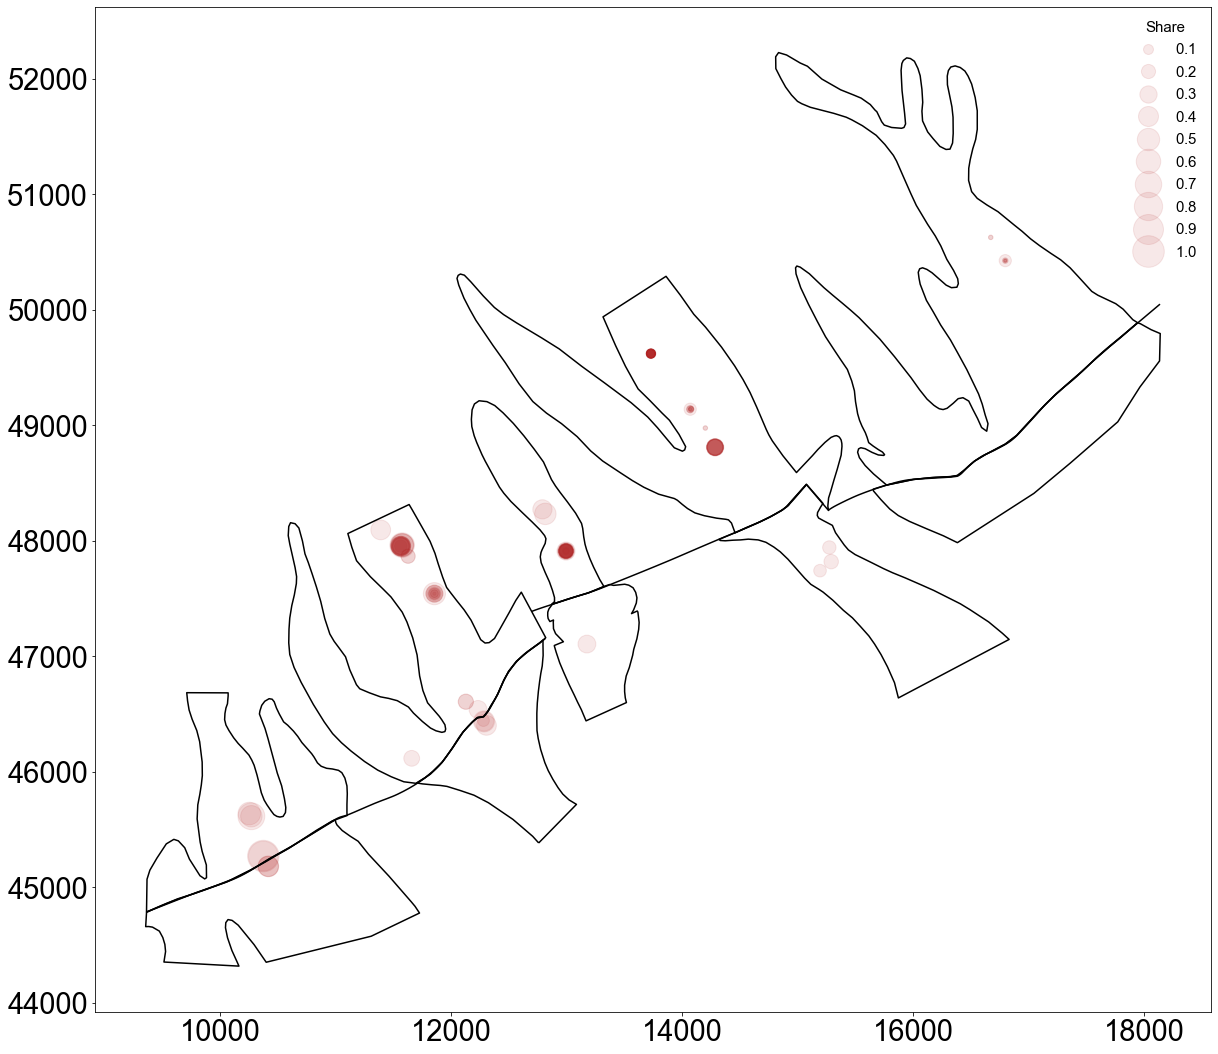

In [79]:

fig, ax = plt.subplots(figsize = (20,20))
#ruh_m = plt.imread('D:\\Kortunov\\transfer\\Hyagda\\maps_test\\zalegy.shp')
BBox = ((df_sum['Y'].min(),   df_sum['Y'].max(),      
          df_sum['X'].min(), df_sum['X'].max()))
zalegy.plot(ax = ax, categorical=True, color = 'black'),#cmap="Set2")

scatter = ax.scatter(df_sum['Y'], df_sum['X'],s =df_sum['НСО3-_доля']*1000 , c = 'firebrick', alpha = 0.1)#, c = df_sum['Glubina'])
kw = dict(prop="sizes", num=10, color='firebrick',
          func=lambda s: s/1000)
# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.3, c = 'red')
legend2 = ax.legend(*scatter.legend_elements(**kw), loc="upper right", title="Share", frameon=False)
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#x.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [1]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, ColumnDataSource#, save
from bokeh.models import HoverTool
output_notebook()
def getLineCoords(row, geom, coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

Loading BokehJS ...

In [2]:
points_source

NameError: name 'points_source' is not defined

In [3]:

zalegy['x'] = zalegy.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
zalegy['y'] = zalegy.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)
zalegy
df_sum_new = df_sum
df_sum_new = df_sum_new.rename(columns={"НСО3-_доля": "HCO3Dolya", "Well №":"Wellnumb","А.О. Центра фильтра":"Centrfiltra"})#, "B": "b", "C": "c"}, errors="raise")
df_sum_new["RadHCO3"] = df_sum_new["HCO3Dolya"]*200
df_sum_new["HCO3Dolya"] = df_sum_new["HCO3Dolya"].astype(str)
df_sum_new["Centrfiltra"] = df_sum_new["Centrfiltra"].astype(str)
df_zalegy = zalegy.drop('geometry', axis=1).copy()
points_source = ColumnDataSource(df_sum_new)
zalegy_source = ColumnDataSource(df_zalegy)
#my_hover = HoverTool()
#my_hover.tooltips = [('Доля по HCO3-', '@НСО3-_доля')]
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
p = figure(plot_width=1000, plot_height=1000,tools=TOOLS)
#p.add_tools(my_hover)
p.multi_line('x', 'y', source=zalegy_source,color='black', line_width=1)
# p.circle('Y', 'X', source=points_source,size=30, color="red",alpha=0.3)
hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Доля по HCO3-', '@HCO3Dolya'),('Номер Скважины',"@Wellnumb"),('А.О. центра фильтра','@Centrfiltra')]
p.scatter(x = 'Y', y = 'X',radius='RadHCO3', color="firebrick",alpha=0.3,source = points_source)
output_file("D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\map_HCO3_Share.html")
save(p)
#show(p)

NameError: name 'zalegy' is not defined

In [282]:
pd.set_option('display.max_rows', 10)
df_sum_new 

,Sample №,Wellnumb,Date,Unnamed: 4,HCO3-,CO32-,SO42-,Cl-,Ca2+,Mg2+,Na+,К+,"Жесткость, мг-экв/дм3","Feобщ., мг/дм3","U, мкг/л",pH,TDS,Минерализация_доля,HCO3Dolya,Mg_доля,№№ п/п,Местоположение отбора пробы,"Еh, мв",(Na+K)+,Zaleg,"СО2, мг/л",Glubina,Ca_доля,(Na+K)+_доля,Cl-_доля,X,Y,Z,A.O Уровни,Centrfiltra,RadHCO3
0,5865-02,5865,2012-03-05 00:00:00,мг/дм3,1653.57,0.0,10.09,13.12,119.24,174.39,157.94,11.34,20.30,0.69,>500.0,NaN,2140.0,0.52,0.51,0.54,NaN,NaN,NaN,169.28,NaN,NaN,NaN,0.52,0.19,0.02,45639.8,10252.4,1215.4,1085.40,1033.40,25.5
1,5866-02,5866,2012-03-11 00:00:00,мг/дм3,2269.84,0.0,14.41,15.95,226.45,210.85,199.09,8.60,28.65,2.55,>500.0,7.4,2945.0,0.72,0.72,0.66,NaN,NaN,NaN,207.69,NaN,NaN,NaN,0.99,0.23,0.02,45616.1,10270.3,1214,1083.00,1031.00,36.0
2,5866-03,5866,2012-06-09 00:00:00,мг/дм3,1507.13,0.0,0,11.70,143.29,157.37,99.54,7.43,20.10,0.99,215.11,7.26,1926.0,0.46,0.46,0.49,NaN,NaN,NaN,106.97,NaN,NaN,NaN,0.62,0.12,0.01,45616.1,10270.3,1214,1083.00,1031.00,23.0
3,5869-02,5869,2012-03-15 00:00:00,мг/дм3,3142.39,0.0,12.97,26.24,229.46,314.75,334.27,13.69,37.35,4.31,205.95,7.14,4074.0,1.00,1.0,1.00,NaN,NaN,NaN,347.96,NaN,NaN,NaN,1.00,0.40,0.03,45271.3,10374.1,1199,1087.00,1031.00,50.0
4,5869-03,5869,2012-05-31 00:00:00,мг/дм3,2806.80,0.0,0,23.40,177.35,300.17,289.67,12.12,33.55,4.15,135.39,7.2,3610.0,0.89,0.89,0.96,NaN,NaN,NaN,301.79,NaN,NaN,NaN,0.77,0.34,0.02,45271.3,10374.1,1199,1087.00,1031.00,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,16,3474,1987-01-27 00:00:00,NaN,719.80,NaN,NaN,NaN,NaN,80.40,NaN,NaN,NaN,NaN,NaN,NaN,573.2,0.12,0.2,0.23,NaN,NaN,NaN,NaN,NaN,350.0,NaN,0.00,0.00,0.00,47867.4,11627.5,1250.89,NaN,1067.64,10.0
130,17,3572,1987-01-27 00:00:00,NaN,134.20,NaN,NaN,NaN,NaN,15.60,NaN,NaN,NaN,NaN,NaN,NaN,113.0,0.00,0.01,0.02,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.00,0.00,0.00,49140.3,14070.1,1228.73,NaN,1051.53,0.5
131,18,3282,1986-02-22 00:00:00,NaN,170.80,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN,NaN,8,154.6,0.02,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,50628.2,16672.1,1241.89,1158.39,1036.89,1.0
132,19,3473,1987-12-03 00:00:00,NaN,963.80,NaN,NaN,NaN,NaN,104.40,NaN,NaN,NaN,NaN,NaN,7.5,747.5,0.17,0.28,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,47543.5,11855.3,1243.91,1100.91,1056.41,14.0


In [107]:
#df_sum.to_csv(r'D:\\Kortunov\\transfer\\Hyagda\\maps_test\\test.csv', index = False, header=True)

In [81]:

df_sum_mg = df_sum[['Sample №','Well №','HCO3-','Cl-','Ca2+','Mg2+','(Na+K)+','TDS','X','Y','Z','Glubina','Zaleg','A.O Уровни','А.О. Центра фильтра']].copy()

In [82]:
df_sum_mmol = df_sum_mg[['Sample №','Well №','HCO3-','Cl-','Ca2+','Mg2+','(Na+K)+','TDS','X','Y','Z','Glubina','Zaleg','A.O Уровни','А.О. Центра фильтра']].copy()

In [83]:
df_sum_mmol['HCO3-'] = df_sum_mmol['HCO3-']/(1+12+16*3)
df_sum_mmol['Cl-'] = df_sum_mmol['Cl-']/(35.4)
df_sum_mmol['Ca2+'] = df_sum_mmol['Ca2+']/(40)
df_sum_mmol['Mg2+'] = df_sum_mmol['Mg2+']/(24.3)
df_sum_mmol['(Na+K)+'] = df_sum_mmol['(Na+K)+']/(23)

In [84]:
#df_sum_mmol

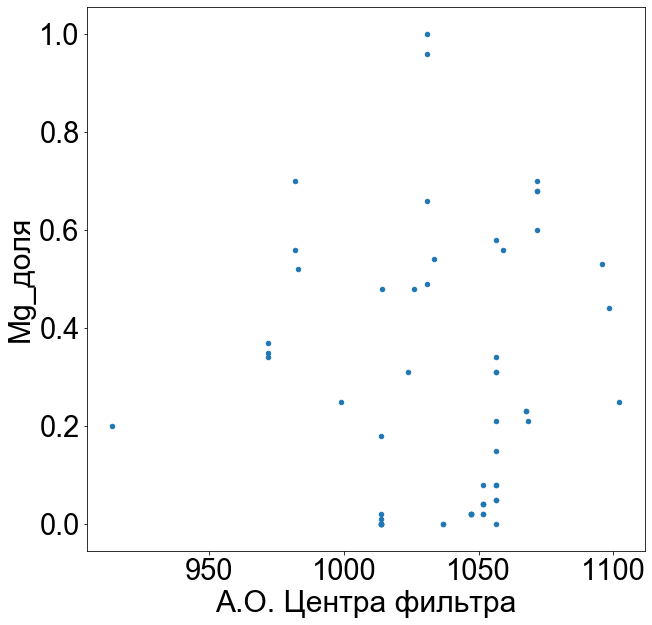

In [97]:
#fig, ax = plt.subplots(figsize = (10,10))
#df_sum_mmol['Glubina'][32] = 156
df_sum.plot('А.О. Центра фильтра','Mg_доля', 'scatter',figsize = (10,10))

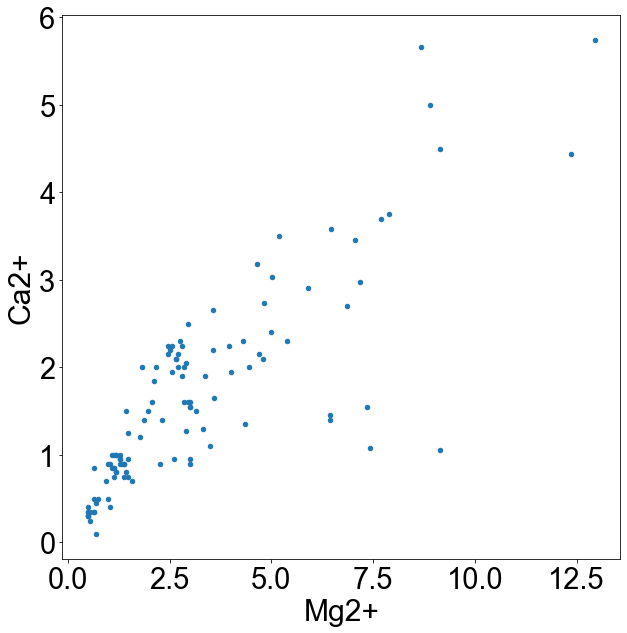

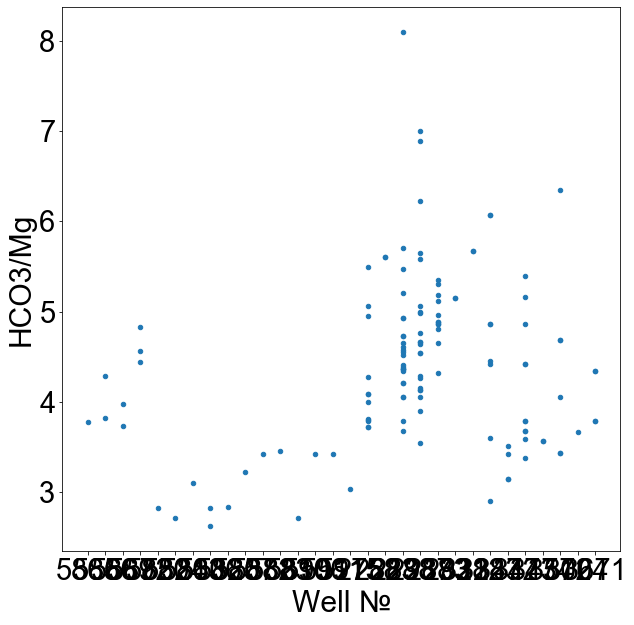

In [133]:
#df_sum_mmol['Glubina']=df_sum_mmol['Glubina'].astype(float)
#df_sum_mmol['ABS_Filter'] = df_sum_mmol['Z']-df_sum_mmol['Glubina']
df_sum_mmol['HCO3/Mg'] = df_sum_mmol['HCO3-']/df_sum_mmol['Mg2+']
#ax = df_sum_mmol.plot('ABS_Filter','Ca/Mg' ,'scatter',figsize = (10,10))
#ax1 = df_sum_mmol.plot('ABS_Filter','Mg2+' ,'scatter',figsize = (10,10))
ax1 = df_sum_mmol.plot('Mg2+','Ca2+' ,'scatter',figsize = (10,10))
ax2 = df_sum_mmol.plot('Well №','HCO3/Mg' ,'scatter',figsize = (10,10))
#df_sum_mmol[['(Na+K)+','Mg2+','Well №']].apply(lambda row: ax1.text(*row),axis=1);
#df_sum_mmol[['TDS','Ca/Mg','Well №']].apply(lambda row: ax.text(*row),axis=1);

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

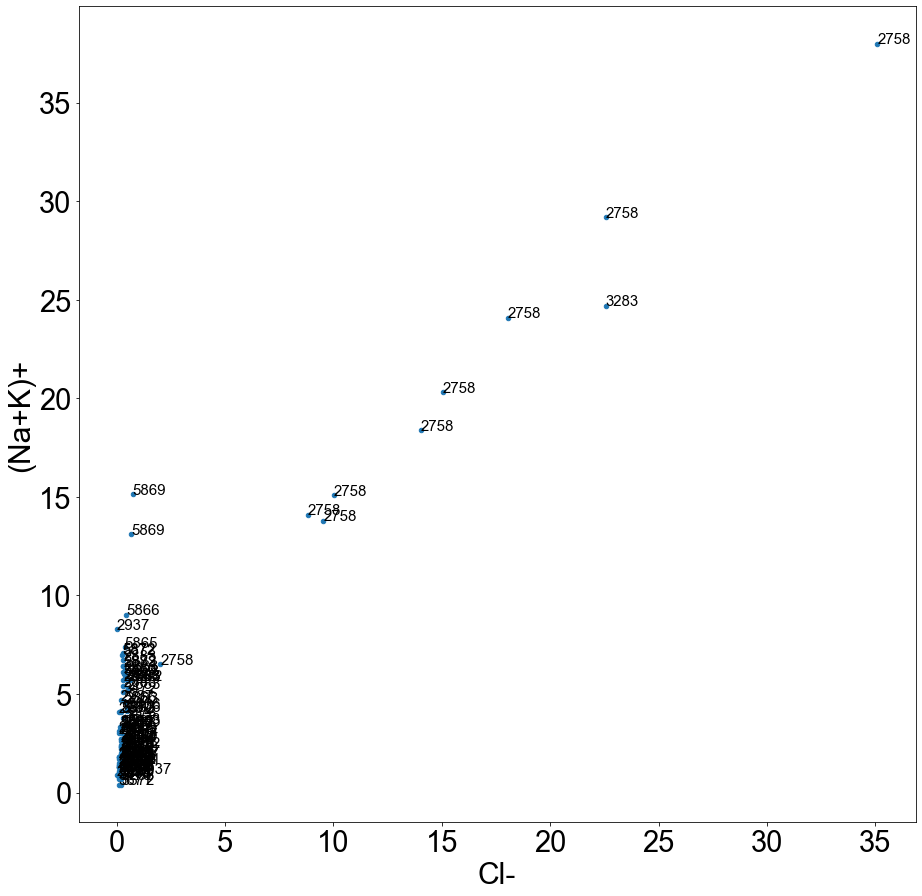

In [135]:
#fig, ax = plt.subplots(figsize = (20,20))
ax = df_sum_mmol.plot('Cl-','(Na+K)+','scatter', figsize = (15,15) )
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
#ax = df.plot('x', 'y', kind='scatter', s=50 )
df_sum_mmol[['Cl-','(Na+K)+','Well №']].apply(lambda row: ax.text(*row),axis=1);
# def annotate_df(row):  
#     ax.annotate(row.name, row.values,
#                 xytext=(10,-5), 
#                 textcoords='offset points',
#                 size=18, 
#                 color='darkslategrey')

# _ = df.apply(annotate_df, axis=1)
#ax = df_sum_mmol.plot('Ca2+'/'Mg2+','scatter', figsize = (15,15) )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

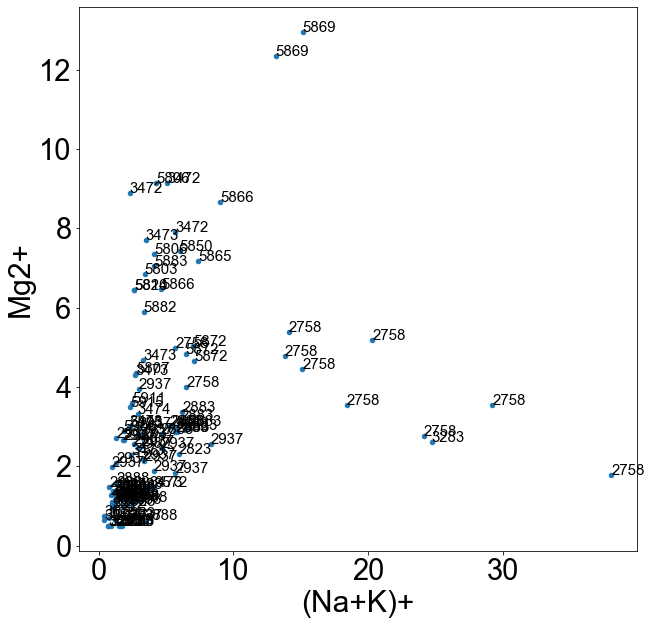

In [109]:

#df_sum_mmol['Glubina']=df_sum_mmol['Glubina'].astype(float)
d#f_sum_mmol['ABS_Filter'] = df_sum_mmol['Z']-df_sum_mmol['Glubina']
df_sum_mmol['Ca/Mg'] = df_sum_mmol['Ca2+']/df_sum_mmol['Mg2+']
#ax = df_sum_mmol.plot('ABS_Filter','Ca/Mg' ,'scatter',figsize = (10,10))
#ax1 = df_sum_mmol.plot('ABS_Filter','Mg2+' ,'scatter',figsize = (10,10))
ax1 = df_sum_mmol.plot('(Na+K)+','Mg2+' ,'scatter',figsize = (10,10))
df_sum_mmol[['(Na+K)+','Mg2+','Well №']].apply(lambda row: ax1.text(*row),axis=1);
#df_sum_mmol[['TDS','Ca/Mg','Well №']].apply(lambda row: ax.text(*row),axis=1);

In [110]:
df_sum_mmol['TDS'].corr(df_sum_mmol['HCO3-']) 

0.9014813019000175

In [111]:
temp = df_sum[df_sum['Well №'] == "2758"]
temp

,Sample №,Well №,Date,Unnamed: 4,HCO3-,CO32-,SO42-,Cl-,Ca2+,Mg2+,Na+,К+,"Жесткость, мг-экв/дм3","Feобщ., мг/дм3","U, мкг/л",pH,TDS,Минерализация_доля,НСО3-_доля,Mg_доля,№№ п/п,Местоположение отбора пробы,"Еh, мв",(Na+K)+,Zaleg,"СО2, мг/л",Glubina,Ca_доля,(Na+K)+_доля,Cl-_доля,X,Y,Z,A.O Уровни,А.О. Центра фильтра
21,11_85,2758,1985-05-28 00:00:00,NaN,549.0,NaN,<0.08,1242.5,48.0,43.2,NaN,NaN,NaN,NaN,NaN,7.5,2482.2,0.60,0.15,0.11,1.0,2758 Залежь 3 С глубины 190 м,240,874.0,3,NaN,190,0.20,1.00,1.00,47955.6,11564.6,1251.03,1102.53,NaN
26,16-85,2758,1985-06-30 00:00:00,NaN,927.2,NaN,55,639.0,92.0,67.2,NaN,NaN,NaN,NaN,NaN,6.9,1871.1,0.45,0.27,0.19,6.0,2758 Залежь 3 С глубины 190 м,-45,554.3,3,NaN,190,0.40,0.64,0.52,47955.6,11564.6,1251.03,1102.53,NaN
31,19_3_85,2758,1985-06-01 00:00:00,NaN,1074.0,NaN,75.0,798.8,106.0,86.4,NaN,NaN,NaN,NaN,NaN,6.9,2274.6,0.55,0.32,0.25,11.0,2758 Залежь 3 С глубины 190 м,-110,671.6,3,NaN,190,0.46,0.77,0.65,47955.6,11564.6,1251.03,1102.53,NaN
38,39-85,2758,1985-07-10 00:00:00,NaN,1293.0,NaN,75,532.5,140.0,126.0,NaN,NaN,NaN,NaN,NaN,7,1987.0,0.48,0.39,0.38,18.0,2758 Залежь 3 С глубины 190 м,-55,466.9,3,NaN,190,0.61,0.53,0.43,47955.6,11564.6,1251.03,1102.53,NaN
40,53-85,2758,1985-12-18 00:00:00,NaN,927.2,NaN,40,497.0,88.0,86.4,NaN,NaN,NaN,NaN,NaN,6.8,1598.2,0.38,0.27,0.25,20.0,2758 Залежь 3 С глубины 190 м,100,423.2,3,NaN,190,0.38,0.48,0.40,47955.6,11564.6,1251.03,1102.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,73-86,2758,1986-02-07 00:00:00,NaN,1159.0,NaN,55,17.8,96.0,121.2,NaN,NaN,NaN,NaN,NaN,NaN,1000.6,0.23,0.35,0.37,29.0,2758 Залежь 5 С глубины 172 м,-,131.1,5,NaN,172,0.41,0.15,0.02,47955.6,11564.6,1251.03,1102.53,NaN
51,77-86,2758,1986-02-21 00:00:00,NaN,1220.0,NaN,40,312.4,92.0,130.8,NaN,NaN,NaN,NaN,NaN,7,1509.5,0.36,0.37,0.40,31.0,2758 Залежь 3 С глубины 170 м,140,324.3,3,NaN,170,0.40,0.37,0.26,47955.6,11564.6,1251.03,1102.53,NaN
60,98-86,2758,1986-03-07 00:00:00,NaN,1110.0,NaN,<0.08,337.3,84.0,116.4,NaN,NaN,NaN,NaN,NaN,7,1410.2,0.33,0.33,0.35,40.0,2758 Залежь 5 С глубины 175 м,160,317.4,5,NaN,175,0.36,0.36,0.28,47955.6,11564.6,1251.03,1102.53,NaN
114,1,2758,1985-07-10 00:00:00,NaN,1293.0,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,7,1987.0,0.48,0.39,0.38,NaN,NaN,NaN,NaN,NaN,440.0,NaN,0.00,0.00,0.00,47955.6,11564.6,1251.03,1102.53,NaN


In [118]:
temp = temp.sort_values(by=['Date'])
temp['elapsed'] = (temp['Date'] - temp['Date'].iloc[0]).astype("timedelta64[m]")
# temp['elapsed'] =  temp.iloc[1:, 3] - df.iat[0, 3]
temp['elapsed']

21          0.0
31       5760.0
26      47520.0
38      61920.0
114     61920.0
         ...   
46     338400.0
49     367200.0
51     387360.0
125    387360.0
60     407520.0
Name: elapsed, Length: 12, dtype: float64

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Time, min')

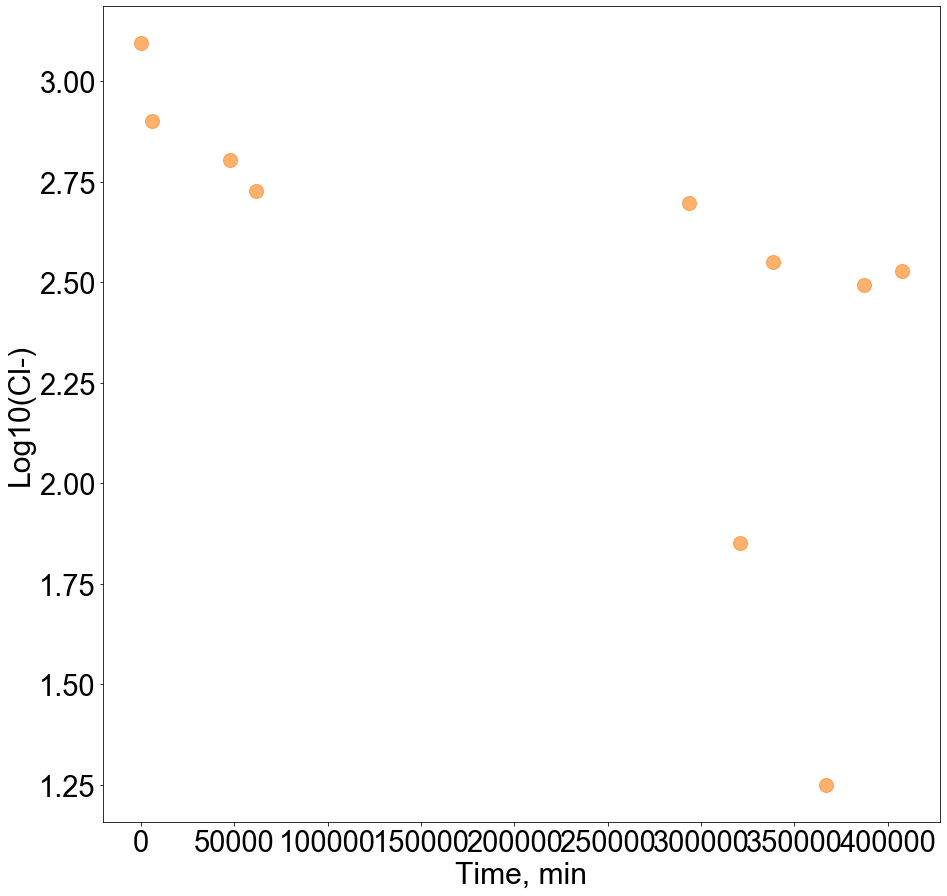

In [127]:
fig, ax1 = plt.subplots(figsize = (15,15))

temp = df_sum[df_sum['Well №'] == "2758"] # радиус 93 мм
temp['elapsed'] = (temp['Date'] - temp['Date'].iloc[0]).astype("timedelta64[m]")
#m, b = np.polyfit(temp['elapsed'], np.log10(temp['Cl-']), 1)
lns1 = ax1.plot(temp['elapsed'], np.log10(temp['Cl-']),'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
#lns2 = ax1.plot(temp['elapsed'],m*temp['elapsed']+b)
ax1.set_ylabel('Log10(Cl-)')#, color = "tab:orange")
ax1.set_xlabel('Time, min')#, color = "tab:orange")

In [134]:
temp
temp.to_csv('D:\\Kortunov\\transfer\\Hyagda\\Для МГУ\\skv2758.csv', index=False)

In [69]:
diam = 93#mm
diam_m = diam/10/100
v = -m*1.81*diam_m
v_days = v*60*24
v_days

0.0004874836967132621

C:\Users\Hydro\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


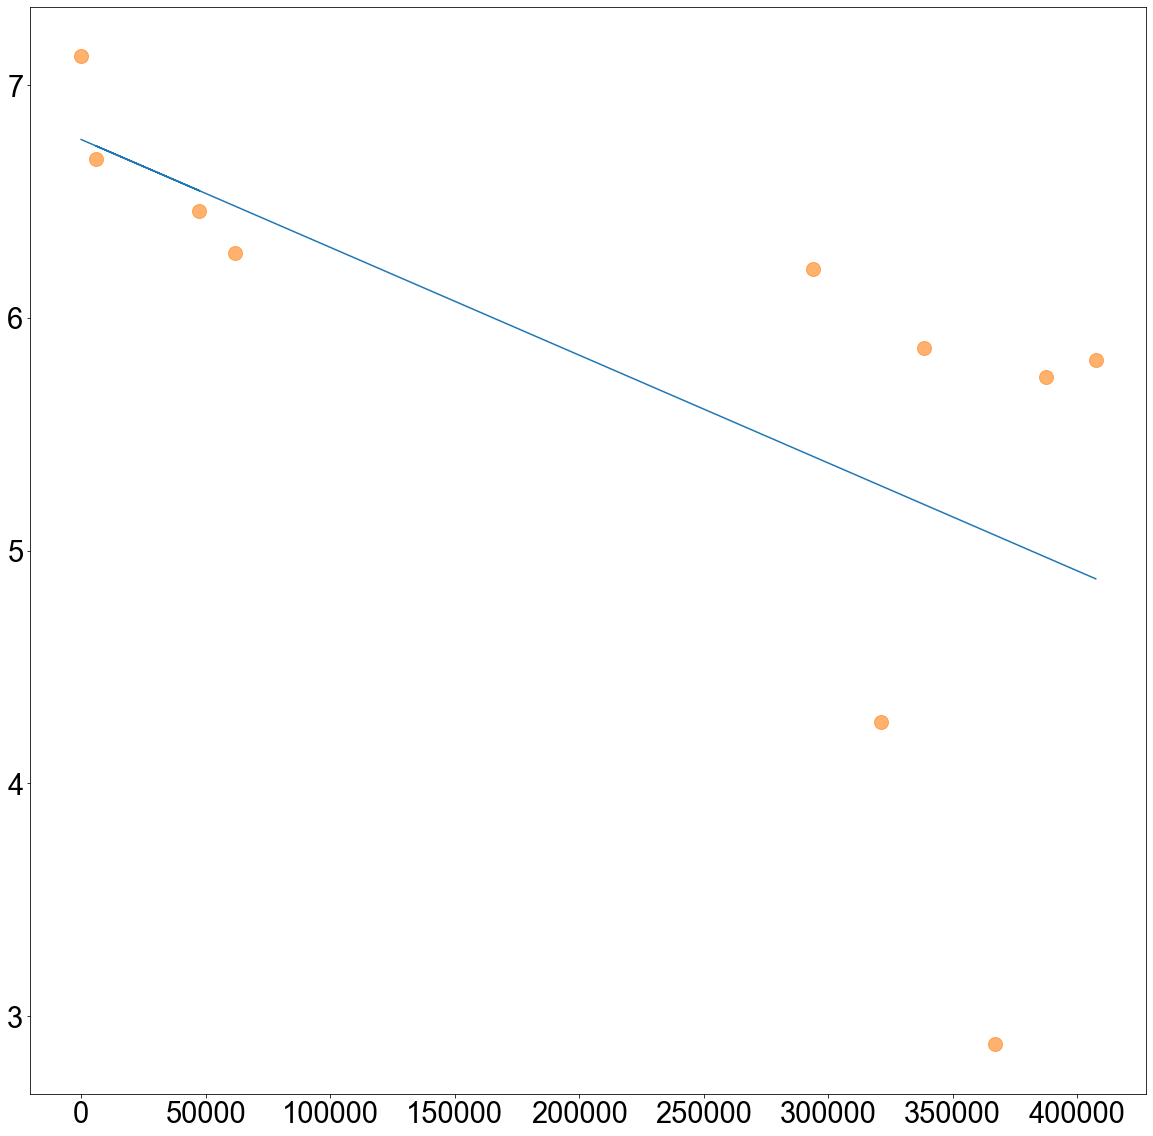

In [70]:
fig, ax1 = plt.subplots(figsize = (20,20))

temp = df_sum[df_sum['Well №'] == "2758"] # радиус 93 мм
temp['elapsed'] = (temp['Date'] - temp['Date'].iloc[0]).astype("timedelta64[m]")
m, b = np.polyfit(temp['elapsed'], np.log(temp['Cl-']), 1)
lns1 = ax1.plot(temp['elapsed'], np.log(temp['Cl-']),'o', alpha = 0.6, color = "tab:orange",label = 'Доля по минерализации',markersize=14, linewidth='0' )
lns2 = ax1.plot(temp['elapsed'],m*temp['elapsed']+b)

In [5]:
diam = 93#mm
diam_m = diam/10/100
v = -m*(np.pi*diam_m/4)
v_days = v*60*24
v_days

NameError: name 'm' is not defined

Рассчет резистивиметрии по данным расходов моделирования

In [4]:
diam = 93#mm
diam_m = 0.5 #diam/10/100
v = 0.078 #m/days
m = -v/3/(np.pi*diam_m/4)
m

NameError: name 'np' is not defined